**Importing Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Reading the Dataset**

In [2]:
df = pd.read_csv('/content/Churn_Modelling.csv')

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.shape

(10000, 14)

The dataset contains 10,000 entries and 14 columns.

**Checking Null Values**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
df.isnull().sum()

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


There are no null values.

**Descriptive Statistics**

In [7]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


**Dropping Irrelevant Variables**

In [8]:
df2= df.drop(columns=["RowNumber","CustomerId","Surname"])

The columns "RowNumber", "CustomerId", and "Surname" were dropped from the dataset because they are unique identifiers that do not provide meaningful insights for analysis. These columns do not contribute to understanding customer behavior or predicting churn. Removing them simplifies the dataset, focusing on relevant features.

In [9]:
df2.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


**Check Outliers through Box-Plot**

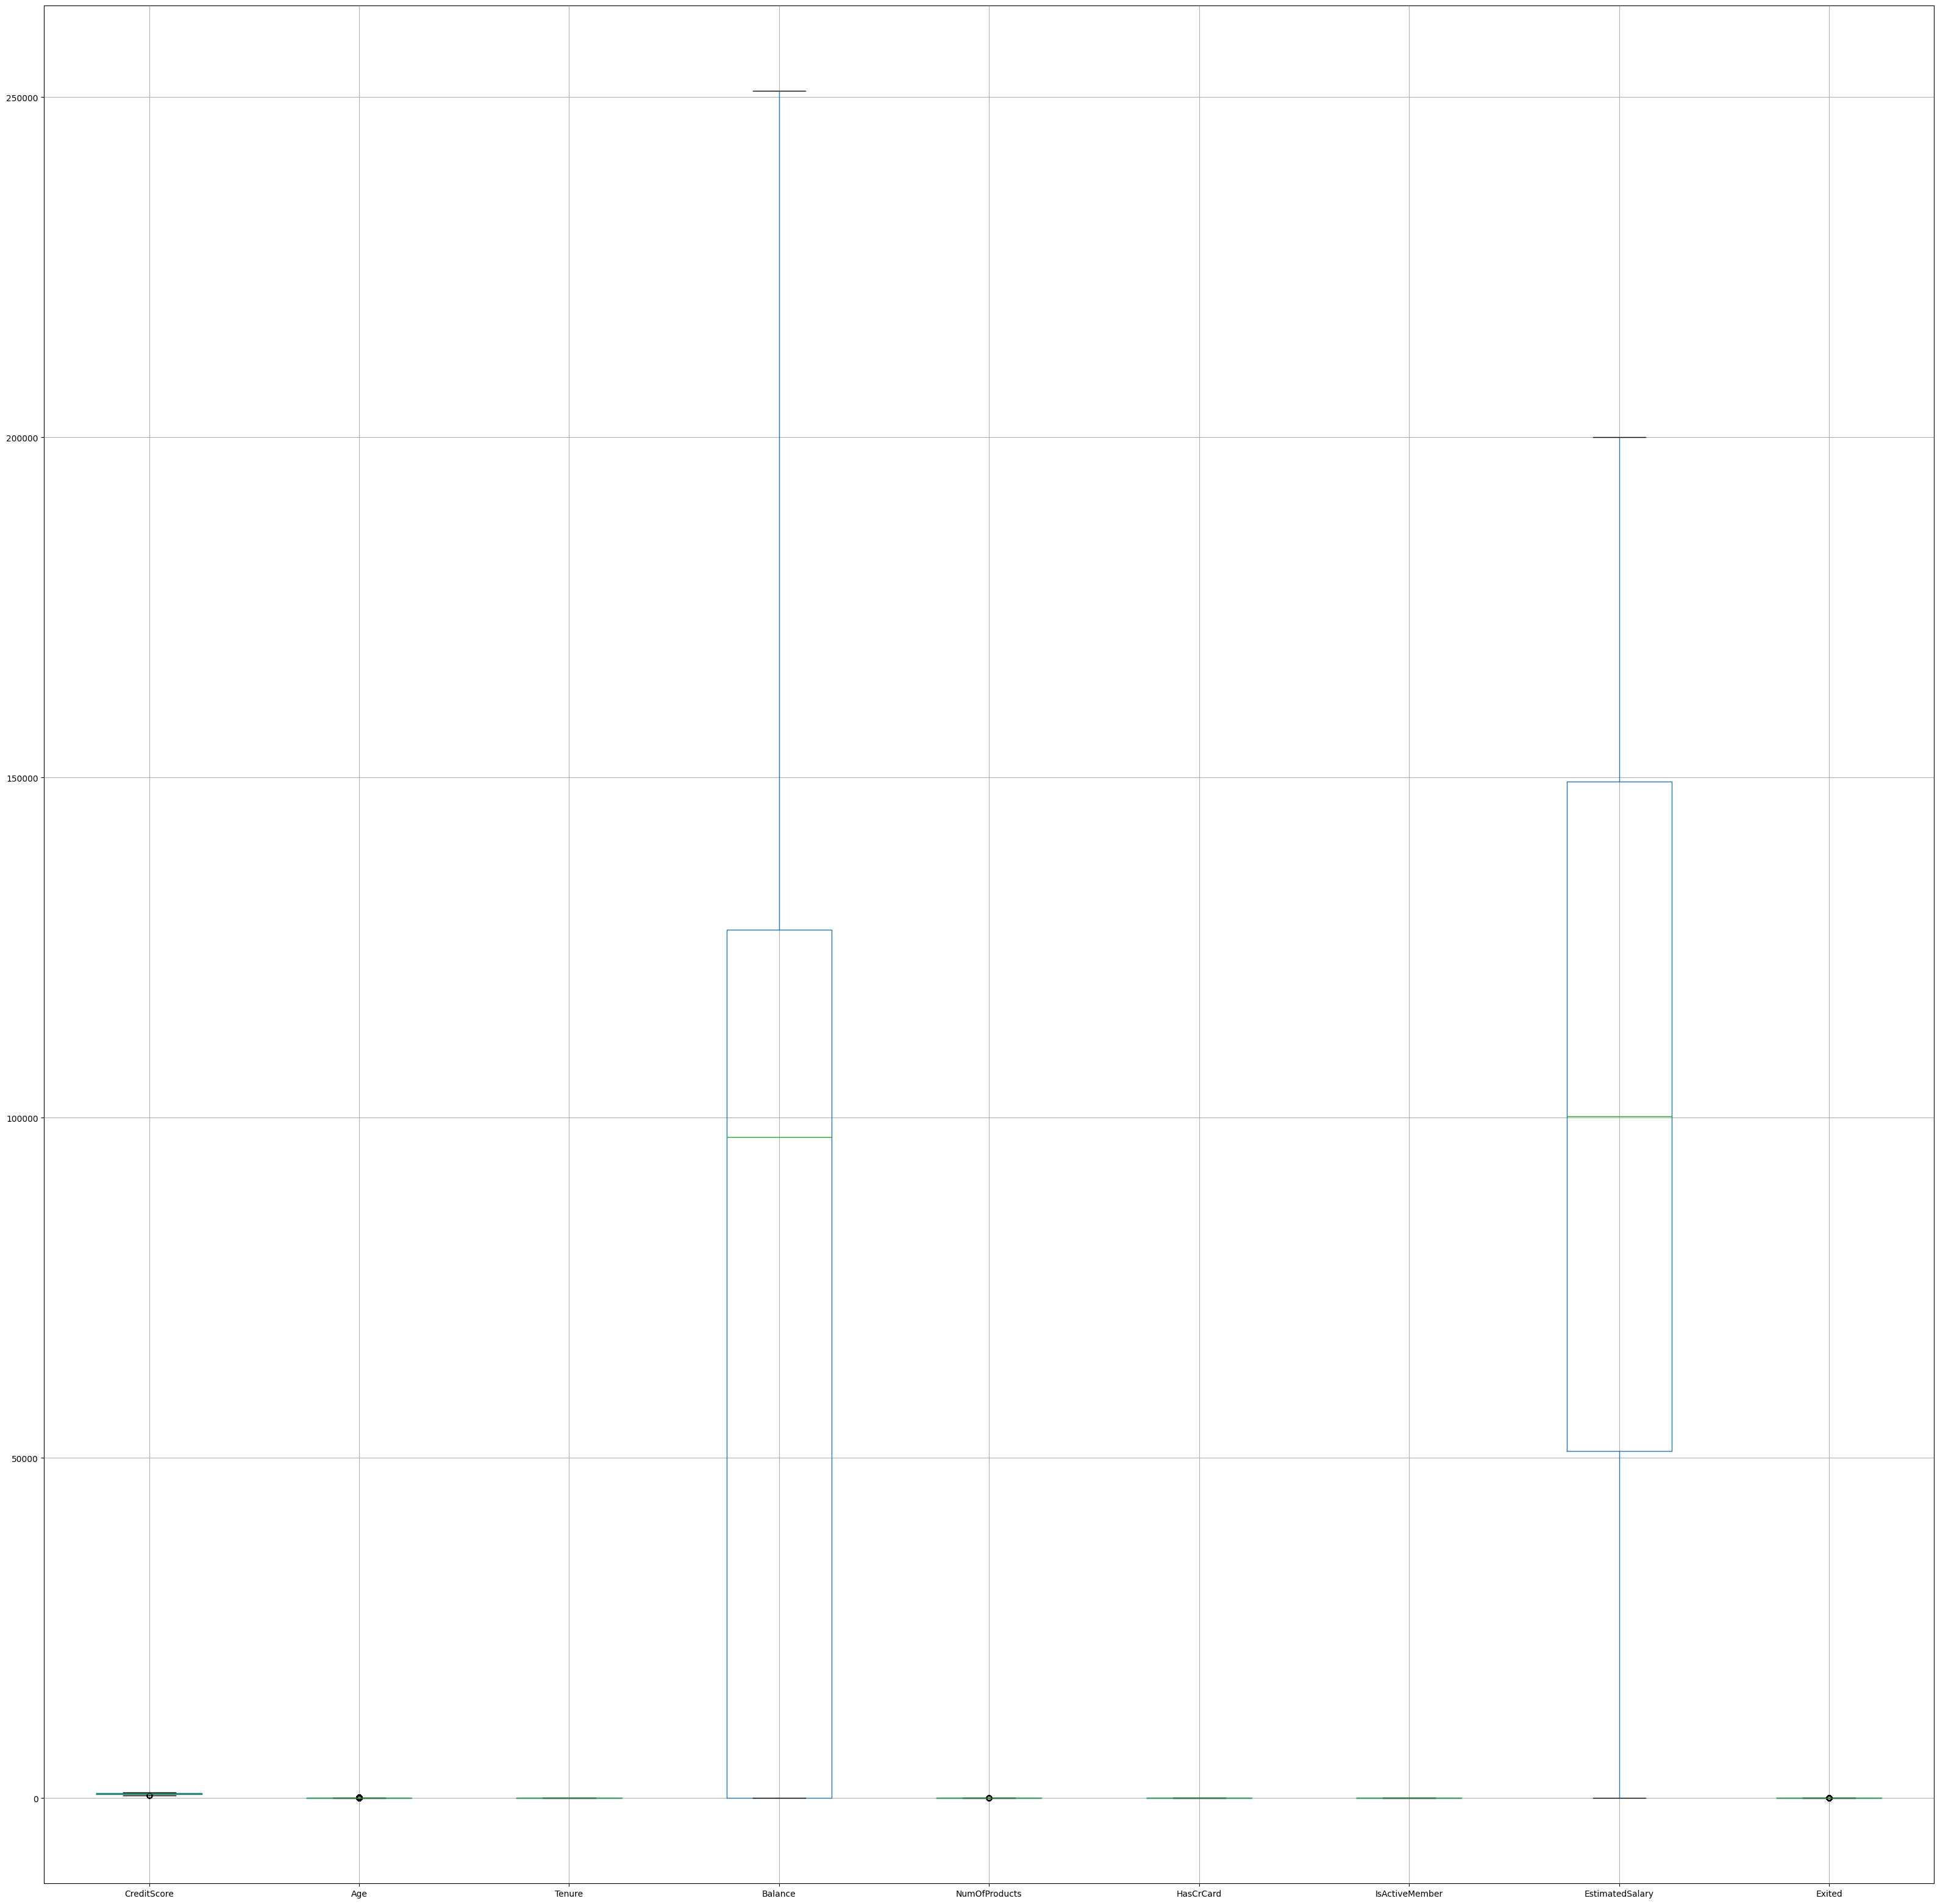

In [10]:
# boxplot to find out outliers
fig, ax = plt.subplots(figsize=(40, 40))

# Plot the box plots for all columns
df2.boxplot(ax=ax)

# Show the plot
plt.show()

Statistical Analysis: The variables like CreditScore, Age, Tenure, NumOfProducts has a narrow IQR,  with outliers detected at both ends of the distributions. Balance variable has a broader IQR, indicating significant variability among the customer balances. Many customers have zero balance and there are substantial outliers at the higher end, suggests that few customers have large balances. Likewise EstimatedSalary has a broader IQR, which indicate wide variability in customer salaries.

**Business Perspective to handle outliers:**

1. **CreditScore:** It is typically ranged between 300 and 850. Outliers at the lower end (below 400) might represent high-risk customers, while scores above 800 indicate very low-risk customers. These extremes can be important for decision-making in lending or risk management rather than being treated as statistical anomalies.

2. **Age:** While ages above 60 or below 20 might be statistical outliers, from a business perspective, they can represent important segments of the customer base, such as retirees or young adults. These age groups could have different financial needs and behaviors.

3. **Tenure:** Customers with very short or very long tenures could be outliers statistically, but they represent new customers or loyal, long-term customers, respectively. Understanding these groups is crucial for customer retention strategies.

4. **Balance:** Extremely high balances might be outliers statistically, but from a business perspective, these customers could be very valuable. Similarly, customers with zero balance could represent a risk of churn or different account usage patterns that are important to understand.

5. **NumOfProducts:** Customers with a very high number of products might be rare, but they represent highly engaged customers. This information is valuable for cross-selling and customer relationship management.

6. **EstimatedSalary:** High salaries might be statistical outliers, but these customers could be key targets for premium services. Similarly, customers with very low salaries might need different financial products and services.

In [11]:
categorical_vars = ['Geography', 'Gender', 'Tenure','NumOfProducts', 'HasCrCard','IsActiveMember']
continuous_vars =  ['CreditScore', 'Age', 'Balance', 'EstimatedSalary']

**Visualisation - 1**

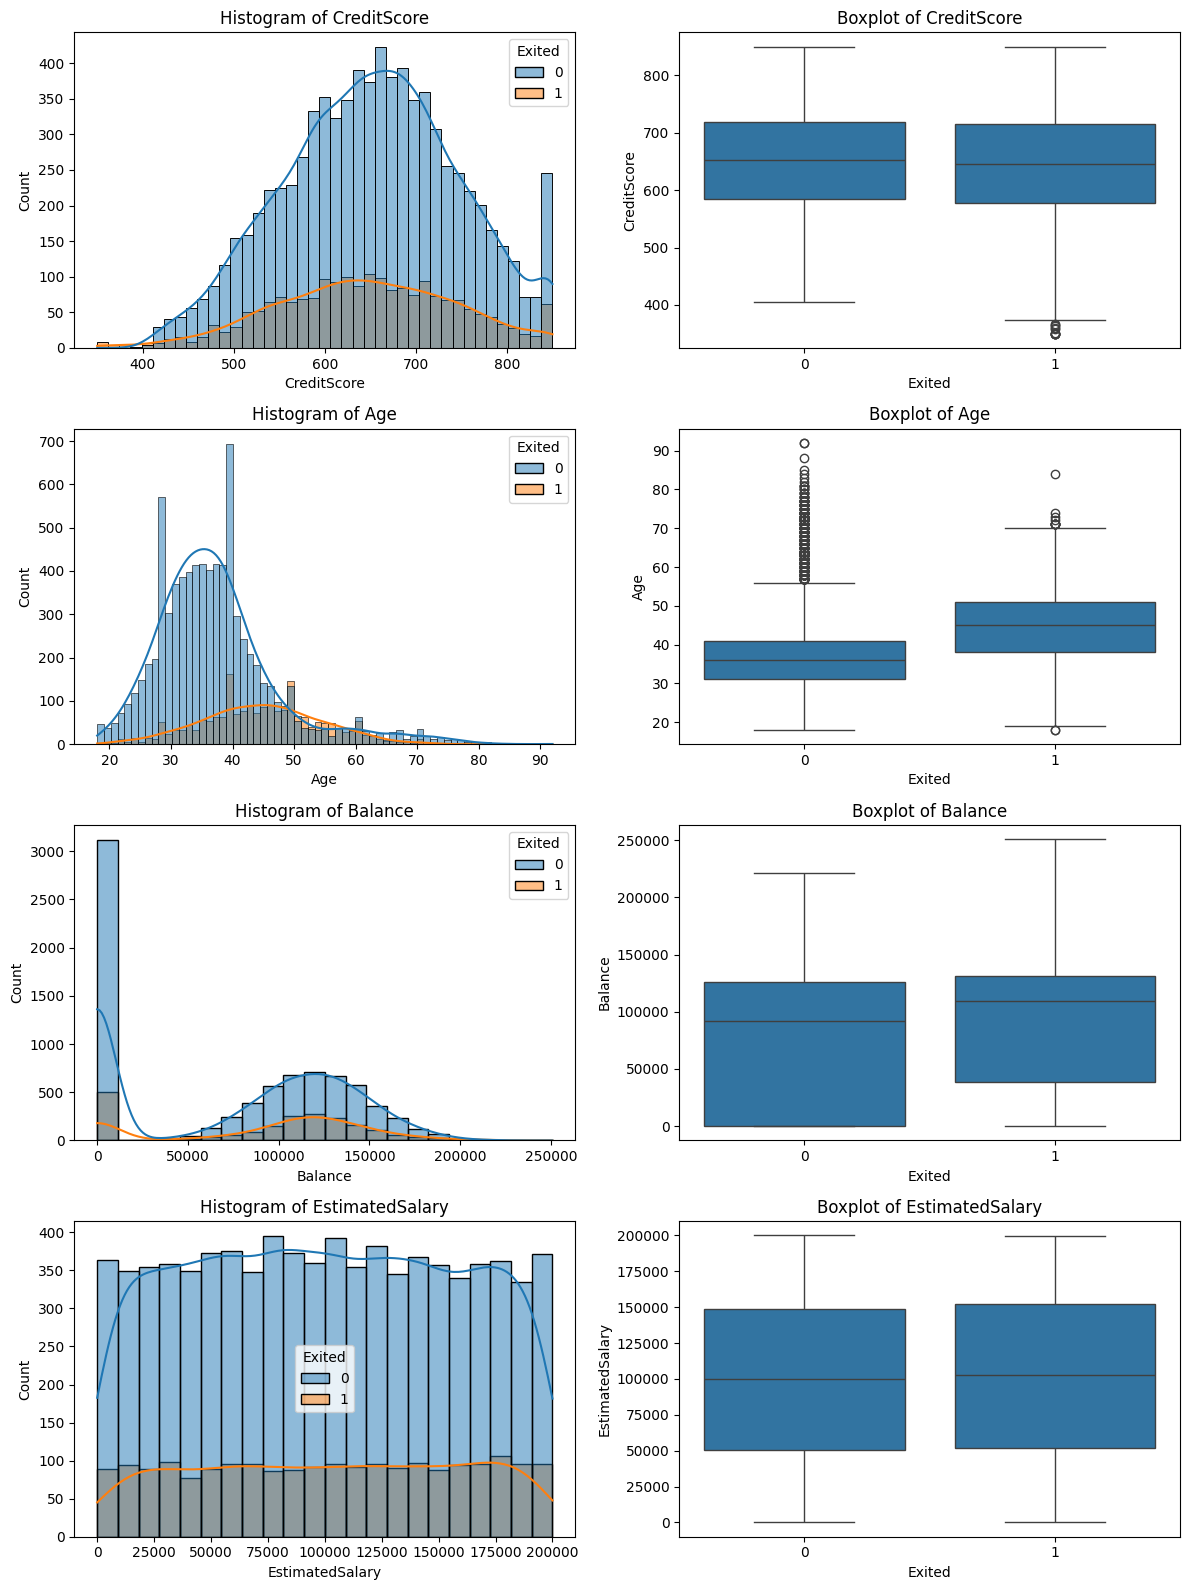

In [12]:
# Set up the figure with subplots
fig, axes = plt.subplots(len(continuous_vars), 2, figsize=(12, len(continuous_vars) * 4))

for i, var in enumerate(continuous_vars):
    # Histogram
    sns.histplot(data=df2, x=var, hue='Exited', ax=axes[i, 0], kde=True)
    axes[i, 0].set_title(f'Histogram of {var}')

    # Boxplot
    sns.boxplot(data=df2, x='Exited', y=var, ax=axes[i, 1])
    axes[i, 1].set_title(f'Boxplot of {var}')

plt.tight_layout()
plt.show()

Histogram and Boxplot of CreditScore
Histogram:

The distribution of credit scores shows a peak around 600-700.
Customers who have exited (Exited = 1) generally have lower credit scores compared to those who have not exited (Exited = 0).

Boxplot:

The median credit score is slightly higher for customers who stayed.
There are several outliers on the lower end for both exited and non-exited customers, but more pronounced for exited customers.

Histogram and Boxplot of Age
Histogram:

The age distribution peaks around 30-40 years.
A significant proportion of customers who exited are older (above 50 years), suggesting age might influence churn.

Boxplot:

The median age is higher for customers who exited.
There are many outliers in the age distribution for both exited and non-exited customers, especially among older age groups.

Histogram and Boxplot of Balance
Histogram:

Many customers have a balance close to zero.
Customers with higher balances (above 100,000) are more likely to have exited.

Boxplot:

The median balance is higher for customers who exited, but the overall distribution is similar for both groups.
There are several high-value outliers in both groups, indicating significant variability in account balances.

Histogram and Boxplot of EstimatedSalary
Histogram:

The estimated salary is uniformly distributed across the range.
The exit rate does not appear to vary significantly across different salary ranges, indicating salary might not be a strong predictor of churn.

Boxplot:

The median estimated salary is almost identical for both exited and non-exited customers.
There are no significant outliers in the salary distribution, and the interquartile ranges are similar for both groups.

CreditScore: Lower credit scores are associated with a higher likelihood
of churn.

Age: Older customers tend to have a higher churn rate.

Balance: Higher balances are associated with a higher likelihood of churn.

EstimatedSalary: Salary does not significantly impact churn, as the distribution is uniform across exited and non-exited groups.

**Visualisation -2**

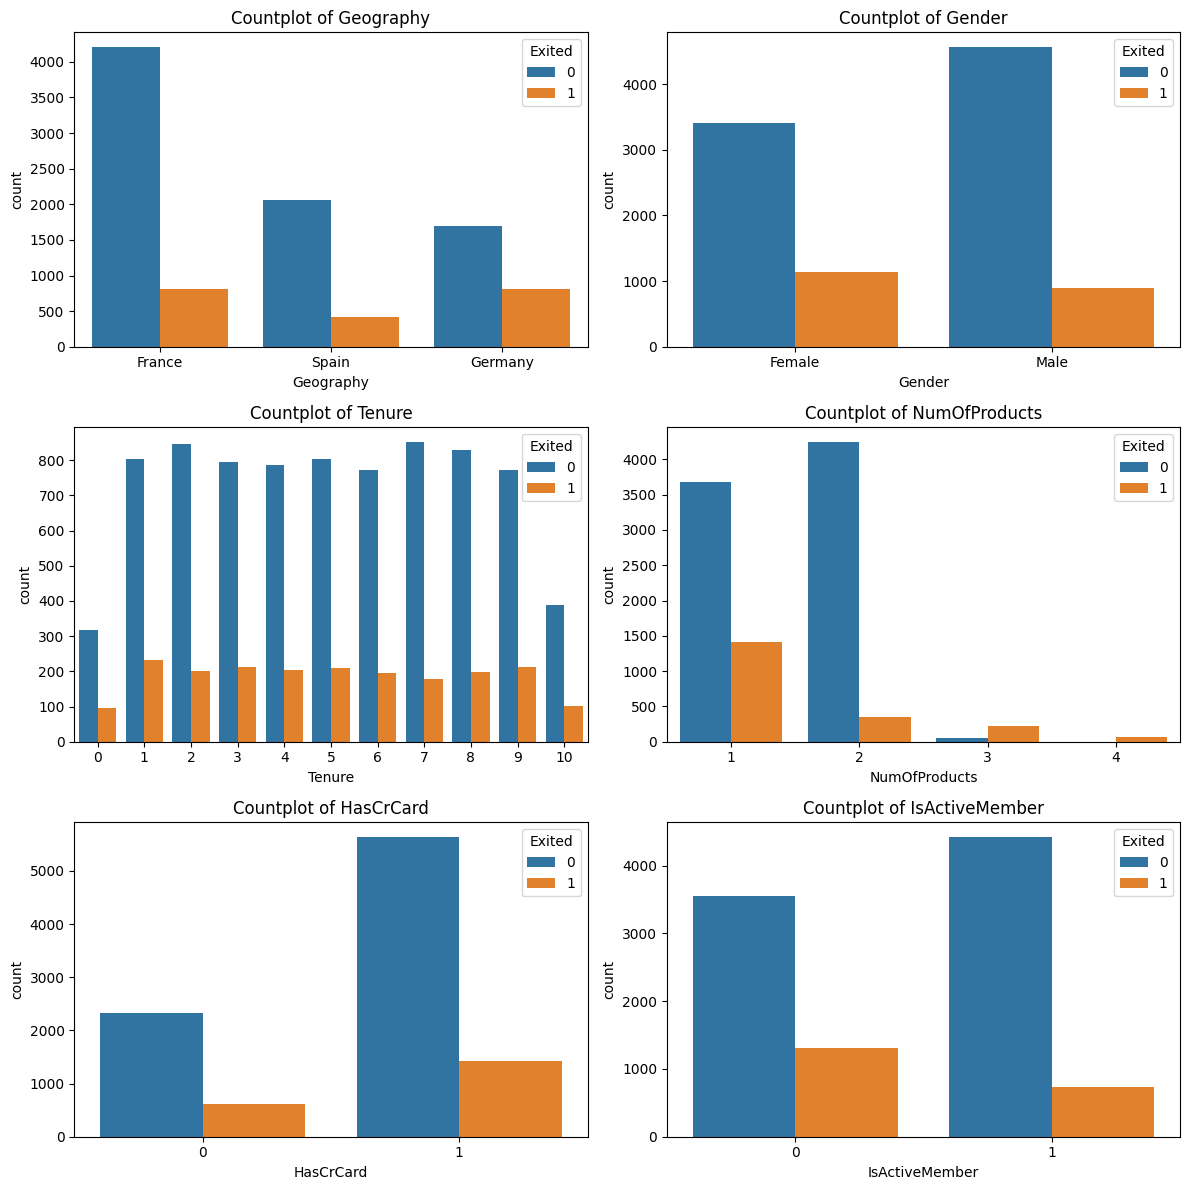

In [13]:
# Set up the figure with subplots
fig, axes = plt.subplots(3, 2, figsize=(12, 12))

for i, var in enumerate(categorical_vars):
    row, col = divmod(i, 2)  # Determine the row and column position
    sns.countplot(data=df2, x=var, hue='Exited', ax=axes[row, col])
    axes[row, col].set_title(f'Countplot of {var}')

plt.tight_layout()
plt.show()

**Countplot of Geography**

France: Most customers are from France, with a relatively smaller proportion exiting.

Spain: Fewer customers compared to France, but the exit rate is similar.

Germany: Has fewer customers than France but a higher proportion of exits, indicating a higher churn rate.

**Countplot of Gender**

Female: The count of female customers is lower than male customers, but the proportion of exits is higher.

Male: More male customers overall, with a lower proportion exiting compared to females.

**Countplot of Tenure**

Tenure: The distribution of tenure is fairly even, but exits are higher for customers with very short (0-1 years) and very long (9-10 years) tenures. This suggests that new customers and those with the longest relationships are more likely to churn.

**Countplot of NumOfProducts**

1 Product: The majority of customers have only one product, with a notable number exiting.

2 Products: A smaller number of customers have two products, but the exit rate is also significant.

3 or 4 Products: Very few customers have three or four products, with a low exit rate, indicating high engagement and lower churn.

**Countplot of HasCrCard**

No Credit Card: Customers without a credit card have a higher exit rate compared to those with a credit card.

Has Credit Card: The majority of customers have a credit card, and their exit rate is lower.

**Countplot of IsActiveMember**

Not Active: Customers who are not active members have a higher exit rate.

Active Member: Active members are less likely to exit, indicating engagement is crucial for retention.

Geography: German customers have a higher churn rate, suggesting that region-specific factors might influence customer retention.

Gender: Female customers are more likely to churn than male customers.

Tenure: Both very new and long-term customers show higher churn rates, possibly indicating onboarding issues and changing needs over time.

NumOfProducts: Customers with only one product are more likely to churn, while those with more products are more engaged and less likely to leave.

HasCrCard: Having a credit card is associated with lower churn, possibly due to higher engagement or satisfaction.

IsActiveMember: Active members are less likely to churn, highlighting the importance of customer engagement.

**Check people with 0 balance**

In [14]:
#Count people having 0 balance in their accounts.
zero_balance_count = df2[df2['Balance'] == 0].shape[0]
total_customers = df2.shape[0]
zero_balance_percentage = (zero_balance_count / total_customers) * 100

print(f"Number of customers with zero balance: {zero_balance_count}")
print(f"Percentage of customers with zero balance: {zero_balance_percentage:.2f}%")

Number of customers with zero balance: 3617
Percentage of customers with zero balance: 36.17%


There are 36.17% of customers that have 0 balance in their account.

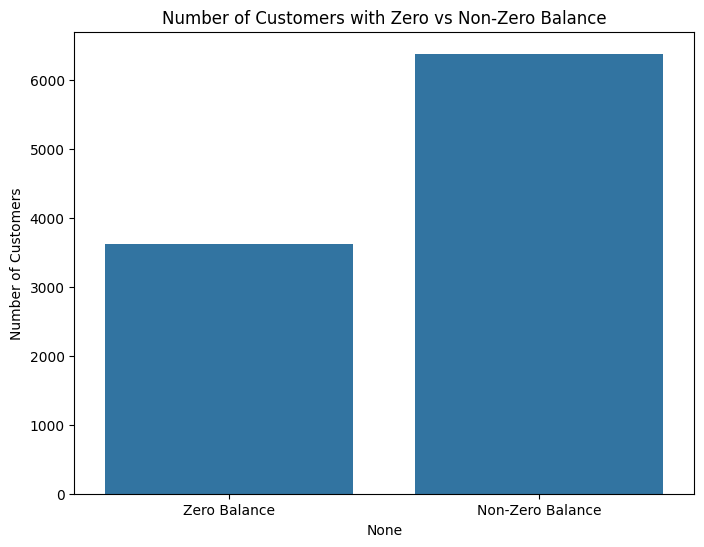

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Data for visualization
balance_counts = pd.Series([zero_balance_count, total_customers - zero_balance_count], index=['Zero Balance', 'Non-Zero Balance'])

# Plotting the bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=balance_counts.index, y=balance_counts.values)
plt.title('Number of Customers with Zero vs Non-Zero Balance')
plt.ylabel('Number of Customers')
plt.show()

**Correlation Matrix**

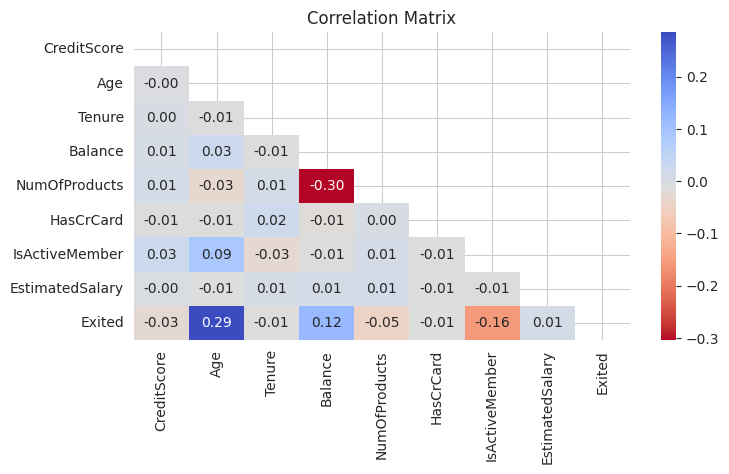

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select the numerical features
numerical_features = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']

# Calculate the correlation matrix
correlation_matrix = df2[numerical_features].corr()

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Create a mask to display only the lower triangle of the matrix
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Create a figure and axis
plt.figure(figsize=(8, 4))

# Create a heatmap of the correlation matrix with the mask
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm_r', fmt=".2f", mask=mask)

# Set the title
plt.title('Correlation Matrix')

# Show the plot
plt.show()

Analyzing the correlation matrix, we can make the following conclusions:

Age and Exited (0.29): There is a weak positive correlation between a customer's age and the likelihood of churn. This suggests that older customers may be slightly more likely to churn compared to younger customers.

Balance and NumOfProducts (-0.30): There is a moderate negative correlation between the number of products a customer has and their account balance. This indicates that customers with more products tend to have lower account balances.

Balance and Exited (0.12): There is a weak positive correlation between a customer's account balance and the likelihood of churn. This suggests that customers with higher account balances may be slightly more likely to churn.

IsActiveMember and Exited (-0.16): There is a weak negative correlation between whether a customer is an active member and the likelihood of churn. This indicates that inactive members may be slightly more likely to churn.

Remaining correlations close to 0: The remaining correlations being close to 0 indicate that there is no correlation between them. This does not mean that there is no relationship at all, as there could still be nonlinear relationships or interactions between variables that are not captured by the correlation coefficient.

# New section

**Feature Engineering**

In [17]:
# Define the features and target variable
X = df2.drop(['Exited'], axis=1)
y = df2['Exited']

# Unique value counts for each column
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
dtypes: float64(2), int64(6), object(2)
memory usage: 781.4+ KB


Handling Categorical Variables: Encode categorical features like Geography and Gender.

**One-Hot Encoding**

In [18]:
X = pd.get_dummies(X, columns=['Geography', 'Gender'], drop_first=True)

**Normalization**

In [19]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Select the numerical columns for scaling
numerical_features = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

# Apply scaling
X[numerical_features] = scaler.fit_transform(X[numerical_features])

**Confirm outliers using z-score**

In [20]:
z_scores = np.abs((X[numerical_features] - X[numerical_features].mean()) / X[numerical_features].std())

In [21]:
outliers_2_std = (z_scores > 2).sum()
print("Outliers beyond 2 standard deviations:")
print(outliers_2_std)

Outliers beyond 2 standard deviations:
CreditScore        500
Age                526
Tenure               0
Balance             30
NumOfProducts      326
EstimatedSalary      0
dtype: int64


In [22]:
outliers_3_std = (z_scores > 3).sum()
print("Outliers beyond 3 standard deviations:")
print(outliers_3_std)

Outliers beyond 3 standard deviations:
CreditScore          8
Age                133
Tenure               0
Balance              0
NumOfProducts       60
EstimatedSalary      0
dtype: int64


**Check Age Distribution**

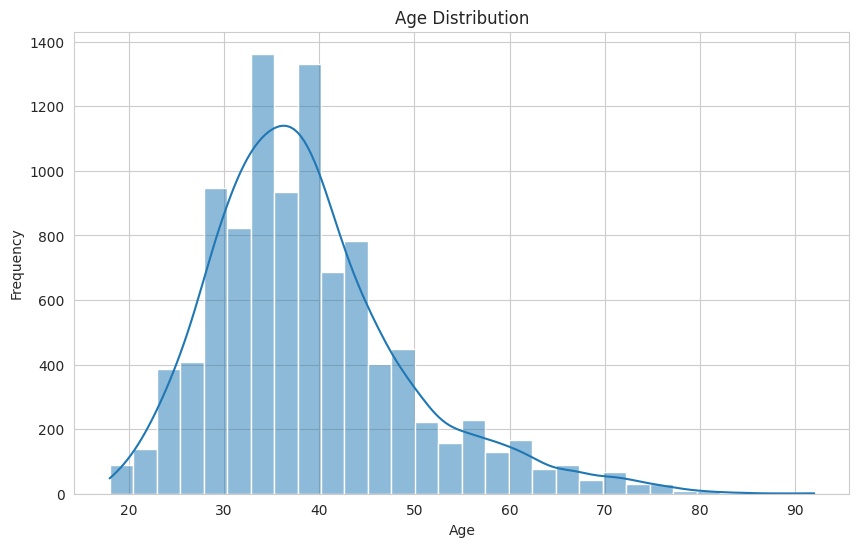

In [23]:
plt.figure(figsize=(10, 6))
sns.histplot(df2['Age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

**Distribution for Number of Products**

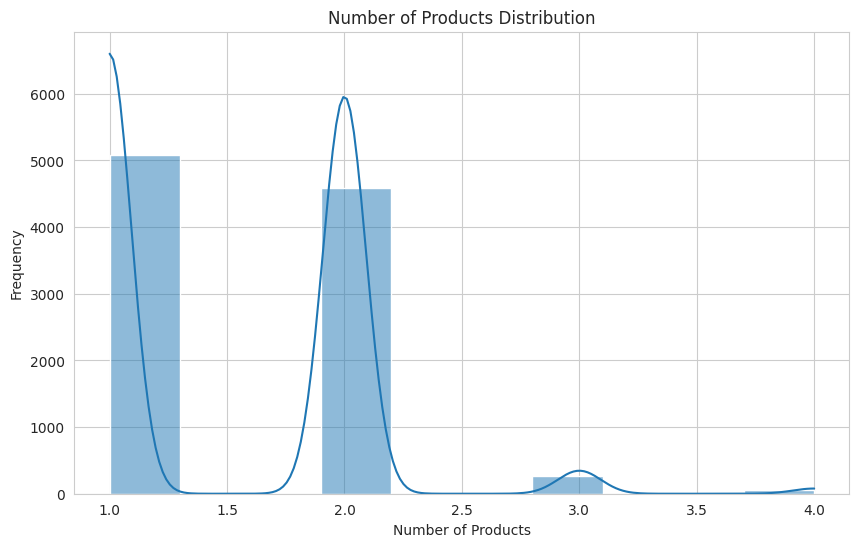

In [24]:
plt.figure(figsize=(10, 6))
sns.histplot(df2['NumOfProducts'], bins=10, kde=True)
plt.title('Number of Products Distribution')
plt.xlabel('Number of Products')
plt.ylabel('Frequency')
plt.show()

**Distribution For Credit Score**

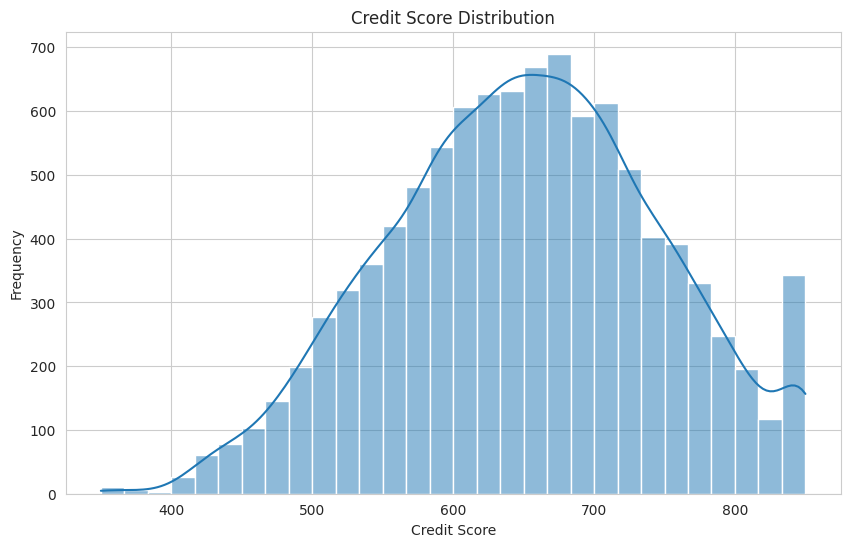

In [25]:
plt.figure(figsize=(10, 6))
sns.histplot(df2['CreditScore'], bins=30, kde=True)
plt.title('Credit Score Distribution')
plt.xlabel('Credit Score')
plt.ylabel('Frequency')
plt.show()

Age Distribution:

The histogram shows that the majority of customers fall within the age range of 20 to 60, with a peak around the age of 40. There are fewer customers beyond the age of 60.
Outliers beyond 3 standard deviations (133 customers) are significantly older or younger compared to the majority. These outliers might include very young customers or very senior customers.
Number of Products Distribution:

The distribution shows that most customers have 1 or 2 products. There are fewer customers with 3 or more products.
Outliers beyond 3 standard deviations (60 customers) likely have an unusually high number of products, which might represent a very small segment of highly engaged or affluent customers.
Credit Score Distribution:

The credit score distribution is slightly skewed towards higher scores, with most customers having scores between 500 and 800. A few customers have scores beyond 800 or below 400.
Outliers beyond 3 standard deviations (8 customers) include those with very high or very low credit scores.
Business Perspective on Outliers:
Age:

Older Customers: Customers who are significantly older may represent a valuable segment due to their potentially higher financial stability and loyalty. Removing these outliers would disregard an important customer base.
Younger Customers: Very young customers may represent new market entrants or future long-term customers. They might have different banking needs and preferences that could provide insights into product offerings tailored to younger demographics.
Number of Products:

High Number of Products: Customers with a high number of products are typically more engaged and valuable to the bank. They might be receiving tailored services or packages that encourage them to adopt multiple products. Removing these outliers would ignore a critical segment that demonstrates high engagement and potential profitability.
Credit Score:

High Credit Scores: Customers with exceptionally high credit scores often represent low risk and high profitability for the bank. They might be eligible for premium services and products.
Low Credit Scores: Customers with very low credit scores might be at higher risk but could also be targeted with specialized financial products aimed at credit rebuilding. Removing these outliers would eliminate insights into how to manage high-risk customers and leverage opportunities for offering tailored financial solutions.

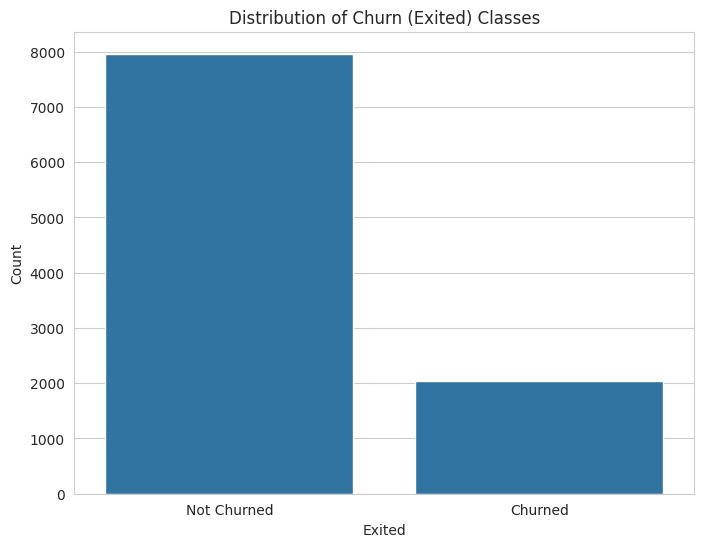

In [26]:
# Plot histogram to check for class imbalance in the 'Exited' column
plt.figure(figsize=(8, 6))
sns.countplot(x=y)
plt.title('Distribution of Churn (Exited) Classes')
plt.xlabel('Exited')
plt.ylabel('Count')
plt.xticks([0, 1], ['Not Churned', 'Churned'])
plt.show()

In [27]:
# Print the counts of each class to check for imbalance
class_counts = y.value_counts()
print("Class Counts:")
print(class_counts)
print("\nClass Percentages:")
print(class_counts / len(y) * 100)

Class Counts:
Exited
0    7963
1    2037
Name: count, dtype: int64

Class Percentages:
Exited
0    79.63
1    20.37
Name: count, dtype: float64


The dataset does not exhibit class imbalance based on 10% criterion. Both classes are well-represented, allowing for robust model training and evaluation.

**Splitting the Data Set**

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [31]:
# Display the shapes of the resulting datasets
print("Training set shape: X_train =", X_train.shape, ", y_train =", y_train.shape)
print("Testing set shape: X_test =", X_test.shape, ", y_test =", y_test.shape)

Training set shape: X_train = (7000, 11) , y_train = (7000,)
Testing set shape: X_test = (3000, 11) , y_test = (3000,)


In [32]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.metrics import roc_curve, auc

!pip install mord
from mord import LogisticIT
import matplotlib.pylab as plt
import seaborn as sns

!pip install dmba
from dmba import classificationSummary, gainsChart, liftChart
from dmba.metric import AIC_score

from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

  Preparing metadata (setup.py) ... done
  Created wheel for mord: filename=mord-0.7-py3-none-any.whl size=9886 sha256=c4a33327877c5528107ea09f933225e3e9b6c7e3d56890b68aacb70036d07140
  Stored in directory: /root/.cache/pip/wheels/77/00/19/3cea86fbfc737ec4acb515cd94497dcc33f943fa157548b96c
Successfully built mord
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 37.6 MB/s eta 0:00:00
Colab environment detected.


In [36]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

**Full Logistic Regression**

In [33]:
#Full Logistic Regression
param_grid_logistic_regression = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['newton-cg', 'lbfgs']
}

In [34]:
logistic_regression = LogisticRegression(max_iter = 1000, random_state = 42)

In [37]:
grid_search_logistic_regression = GridSearchCV(logistic_regression, param_grid_logistic_regression, cv = 5, scoring='accuracy')

# Fit the model on the training data to discover the best hyperparameters

grid_search_logistic_regression.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000, random_state=42),
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'solver': ['newton-cg', 'lbfgs']},
             scoring='accuracy')

In [38]:
print("Optimal parameters for Logistic Regression:", grid_search_logistic_regression.best_params_)
print("Highest cross-validation accuracy for Logistic Regression:", grid_search_logistic_regression.best_score_ * 100)

Optimal parameters for Logistic Regression: {'C': 0.1, 'solver': 'newton-cg'}
Highest cross-validation accuracy for Logistic Regression: 80.92857142857144


 The optimal parameters found are {'C': 0.1, 'solver': 'newton-cg'} with a cross-validation accuracy of approximately 80.93%

In [39]:
best_logistic_regression = grid_search_logistic_regression.best_estimator_
best_logistic_regression.fit(X_train, y_train)

LogisticRegression(C=0.1, max_iter=1000, random_state=42, solver='newton-cg')

In [40]:
#Make predictions on the test set
pred_y_logistic_regression = best_logistic_regression.predict(X_test)
pred_y_proba_logistic_regression = best_logistic_regression.predict_proba(X_test)[:, 1]

In [43]:
#Make predictions on the training set
pred_y_logistic_regression_train = best_logistic_regression.predict(X_train)
pred_y_proba_logistic_regression_train = best_logistic_regression.predict_proba(X_train)[:, 1]

In [41]:
#classification report for the test set
print("Full Logistic Regression")
print("Confusion Matrix:")
print(confusion_matrix(y_test, pred_y_logistic_regression))
print("\nClassification Report:")
print(classification_report(y_test, pred_y_logistic_regression))
print("\nROC-AUC Score:", roc_auc_score(y_test, pred_y_proba_logistic_regression))

Full Logistic Regression
Confusion Matrix:
[[2328   88]
 [ 471  113]]

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.96      0.89      2416
           1       0.56      0.19      0.29       584

    accuracy                           0.81      3000
   macro avg       0.70      0.58      0.59      3000
weighted avg       0.78      0.81      0.78      3000


ROC-AUC Score: 0.7741065556109952


True Positives (TP): 113 instances where the model correctly predicted churn.

True Negatives (TN): 2328 instances where the model correctly predicted no churn.

False Positives (FP): 88 instances where the model incorrectly predicted churn.

False Negatives (FN): 471 instances where the model incorrectly predicted no churn.

 For class 0 (no churn), the precision is 0.83, indicating that 83% of the instances predicted as no churn were correct. The recall for class 0 is 0.96, meaning the model correctly identified 96% of the actual no churn instances. The F1-score, which is the harmonic mean of precision and recall, is 0.89 for class 0.

For class 1 (churn), the precision is 0.56, indicating that 56% of the instances predicted as churn were correct. The recall for class 1 is 0.19, meaning the model correctly identified only 19% of the actual churn instances. The F1-score for class 1 is 0.28, reflecting a lower balance between precision and recall.

The overall accuracy of the model is 0.81, signifying that 81% of all predictions made by the model were correct. The macro average of the metrics, which treats all classes equally, shows a precision of 0.70, recall of 0.58, and F1-score of 0.59. The weighted average, which takes into account the support (number of true instances) for each class, shows a precision of 0.78, recall of 0.81, and F1-score of 0.78. These metrics collectively indicate that while the model performs well in predicting the no churn class, it has significant room for improvement in predicting the churn class.

In [44]:
#classification report for the training set
print("Training Set Evaluation")
print("Confusion Matrix:")
print(confusion_matrix(y_train, pred_y_logistic_regression_train))
print("\nClassification Report:")
print(classification_report(y_train, pred_y_logistic_regression_train))
print("\nROC-AUC Score:", roc_auc_score(y_train, pred_y_proba_logistic_regression_train))

Training Set Evaluation
Confusion Matrix:
[[5357  190]
 [1147  306]]

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.97      0.89      5547
           1       0.62      0.21      0.31      1453

    accuracy                           0.81      7000
   macro avg       0.72      0.59      0.60      7000
weighted avg       0.78      0.81      0.77      7000


ROC-AUC Score: 0.7656321361186662


For class 0 (no churn), the precision is 0.82, indicating that 82% of the instances predicted as no churn were correct. The recall for class 0 is 0.97, meaning the model correctly identified 97% of the actual no churn instances. The F1-score, which is the harmonic mean of precision and recall, is 0.89 for class 0.

For class 1 (churn), the precision is 0.62, indicating that 62% of the instances predicted as churn were correct. The recall for class 1 is 0.21, meaning the model correctly identified only 21% of the actual churn instances. The F1-score for class 1 is 0.31, reflecting a lower balance between precision and recall.

The overall accuracy of the model on the training set is 0.81, signifying that 81% of all predictions made by the model were correct. The macro average of the metrics, which treats all classes equally, shows a precision of 0.72, recall of 0.59, and F1-score of 0.60. The weighted average, which takes into account the support (number of true instances) for each class, shows a precision of 0.78, recall of 0.81, and F1-score of 0.77. These metrics collectively indicate that while the model performs well in predicting the no churn class, it has significant room for improvement in predicting the churn class on the training set as well. The ROC-AUC score for the training set is 0.7656, further indicating the model's ability to distinguish between the classes.

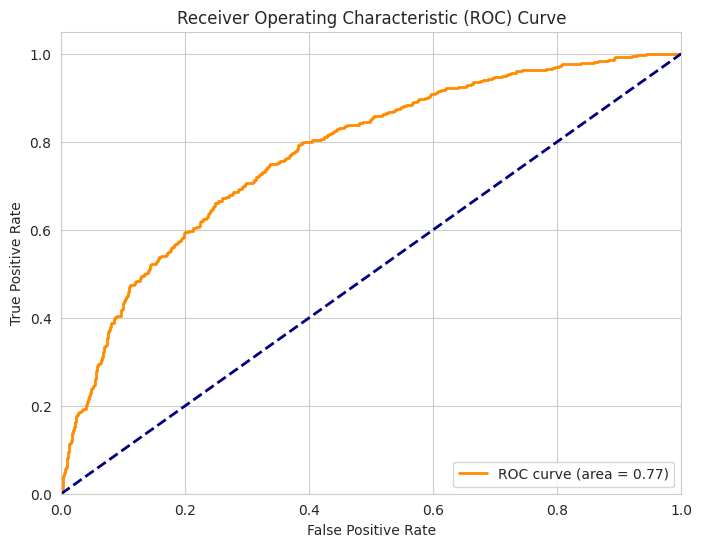

In [42]:
fpr, tpr, _ = roc_curve(y_test, pred_y_proba_logistic_regression)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In this plot, the x-axis represents the False Positive Rate (FPR), which is the proportion of actual negatives (no churn) that were incorrectly predicted as positives (churn). The y-axis represents the True Positive Rate (TPR), also known as recall or sensitivity, which is the proportion of actual positives (churn) that were correctly predicted.

The ROC curve illustrates the trade-off between the True Positive Rate and the False Positive Rate at various threshold settings. The blue dashed diagonal line represents a random classifier, which would have an area under the curve (AUC) of 0.5, indicating no discriminatory power.

The orange curve is the ROC curve of the logistic regression model. The closer this curve follows the left-hand border and then the top border of the ROC space, the better the model's performance. Here, the curve indicates that the model has a decent ability to distinguish between the churn and no churn classes, as it is above the diagonal line.

The area under the ROC curve (AUC) is 0.77, suggesting that there is a 77% chance that the model will be able to distinguish between a randomly chosen positive instance and a randomly chosen negative instance. This AUC value indicates a fairly good level of discrimination ability of the logistic regression model on this dataset.

From a business perspective, the logistic regression model's performance in predicting customer churn is moderately effective, with an overall accuracy of 81% and an ROC-AUC score of 0.77. The high precision (83%) and recall (96%) for predicting non-churning customers suggest that the model is reliable in identifying customers who are likely to stay, enabling targeted retention strategies. However, the model's lower precision (56%) and recall (19%) for predicting churning customers indicate room for improvement in detecting potential churners. This insight highlights the need for more refined models or additional data features to better identify at-risk customers.

**Forward Regression**

In [45]:
#Forward Regression
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [46]:
sfs_forward = SequentialFeatureSelector(logistic_regression, n_features_to_select = 10, direction = 'forward')
sfs_forward.fit(X_train, y_train)

SequentialFeatureSelector(estimator=LogisticRegression(max_iter=1000,
                                                       random_state=42),
                          n_features_to_select=10)

In [47]:
selected_features_forward = sfs_forward.get_support(indices=True)

train_X_selected_forward = X_train.iloc[:, selected_features_forward]

test_X_selected_forward = X_test.iloc[:, selected_features_forward]

In [48]:
grid_search_logistic_regression_forward = GridSearchCV(logistic_regression, param_grid_logistic_regression, cv = 5, scoring = 'accuracy')

grid_search_logistic_regression_forward.fit(train_X_selected_forward, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000, random_state=42),
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'solver': ['newton-cg', 'lbfgs']},
             scoring='accuracy')

In [49]:
print("Optimal parameters for Forward Logistic Regression:", grid_search_logistic_regression_forward.best_params_)
print("Highest cross-validation accuracy for Forward Logistic Regression:", grid_search_logistic_regression_forward.best_score_ * 100)

Optimal parameters for Forward Logistic Regression: {'C': 1, 'solver': 'newton-cg'}
Highest cross-validation accuracy for Forward Logistic Regression: 81.04285714285714


In [50]:
best_logistic_regression_forward = grid_search_logistic_regression_forward.best_estimator_
best_logistic_regression_forward.fit(train_X_selected_forward, y_train)

LogisticRegression(C=1, max_iter=1000, random_state=42, solver='newton-cg')

In [51]:
#Make predictions on the test set
pred_y_logistic_regression_forward = best_logistic_regression_forward.predict(test_X_selected_forward)
pred_y_proba_logistic_regression_forward = best_logistic_regression_forward.predict_proba(test_X_selected_forward)[:, 1]

In [52]:
#Make predictions on training set
pred_y_logistic_regression_forward_train = best_logistic_regression_forward.predict(train_X_selected_forward)
pred_y_proba_logistic_regression_forward_train = best_logistic_regression_forward.predict_proba(train_X_selected_forward)[:, 1]

In [53]:
#Evaluate the model on the test set
print("Forward Selection Logistic Regression")
print("Confusion Matrix:")
print(confusion_matrix(y_test, pred_y_logistic_regression_forward))
print("\nClassification Report:")
print(classification_report(y_test, pred_y_logistic_regression_forward))
print("\nROC-AUC Score:", roc_auc_score(y_test, pred_y_proba_logistic_regression_forward))

Forward Selection Logistic Regression
Confusion Matrix:
[[2322   94]
 [ 469  115]]

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.96      0.89      2416
           1       0.55      0.20      0.29       584

    accuracy                           0.81      3000
   macro avg       0.69      0.58      0.59      3000
weighted avg       0.78      0.81      0.77      3000


ROC-AUC Score: 0.7740966331760863


The confusion matrix for the Forward Selection Logistic Regression on the test set shows 2322 true negatives, 94 false positives, 469 false negatives, and 115 true positives. This indicates that the model correctly identified 2322 instances of no churn and 115 instances of churn but made errors in 94 cases where no churn was predicted as churn and 469 cases where churn was predicted as no churn.

The classification report reveals that for class 0 (No Churn), the precision is 0.83, meaning 83% of instances predicted as no churn were correct. The recall for class 0 is 0.96, indicating the model correctly identified 96% of the actual no churn instances. The F1-score for class 0 is 0.89, representing the harmonic mean of precision and recall.

For class 1 (Churn), the precision is 0.55, meaning 55% of instances predicted as churn were correct. The recall for class 1 is 0.20, indicating the model correctly identified 20% of the actual churn instances. The F1-score for class 1 is 0.29, representing the harmonic mean of precision and recall.

The overall accuracy of the model is 0.81. The macro average precision, recall, and F1-score are 0.69, 0.58, and 0.59, respectively, indicating an average performance across both classes. The weighted average precision, recall, and F1-score are 0.78, 0.81, and 0.77, respectively, accounting for the support (number of instances) of each class. The ROC-AUC score for the test set is 0.7740966331760863, indicating a moderate level of separability between the classes.

In [54]:
#evaluate the model on the training set
print("Forward Selection Logistic Regression - Training Set")
print("Confusion Matrix:")
print(confusion_matrix(y_train, pred_y_logistic_regression_forward_train))
print("\nClassification Report:")
print(classification_report(y_train, pred_y_logistic_regression_forward_train))
print("\nROC-AUC Score:", roc_auc_score(y_train, pred_y_proba_logistic_regression_forward_train))

Forward Selection Logistic Regression - Training Set
Confusion Matrix:
[[5350  197]
 [1129  324]]

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.96      0.89      5547
           1       0.62      0.22      0.33      1453

    accuracy                           0.81      7000
   macro avg       0.72      0.59      0.61      7000
weighted avg       0.78      0.81      0.77      7000


ROC-AUC Score: 0.7649853451534908


The confusion matrix for the Forward Selection Logistic Regression on the training set shows 5350 true negatives, 197 false positives, 1129 false negatives, and 324 true positives. This indicates that the model correctly identified 5350 instances of no churn and 324 instances of churn but made errors in 197 cases where no churn was predicted as churn and 1129 cases where churn was predicted as no churn.

The classification report reveals that for class 0 (No Churn), the precision is 0.83, meaning 83% of instances predicted as no churn were correct. The recall for class 0 is 0.96, indicating the model correctly identified 96% of the actual no churn instances. The F1-score for class 0 is 0.89, representing the harmonic mean of precision and recall.

For class 1 (Churn), the precision is 0.62, meaning 62% of instances predicted as churn were correct. The recall for class 1 is 0.22, indicating the model correctly identified 22% of the actual churn instances. The F1-score for class 1 is 0.33, representing the harmonic mean of precision and recall.

The overall accuracy of the model is 0.81. The macro average precision, recall, and F1-score are 0.72, 0.59, and 0.61, respectively, indicating an average performance across both classes. The weighted average precision, recall, and F1-score are 0.78, 0.81, and 0.77, respectively, accounting for the support (number of instances) of each class. The ROC-AUC score for the training set is 0.7649853451534908, indicating a moderate level of separability between the classes.

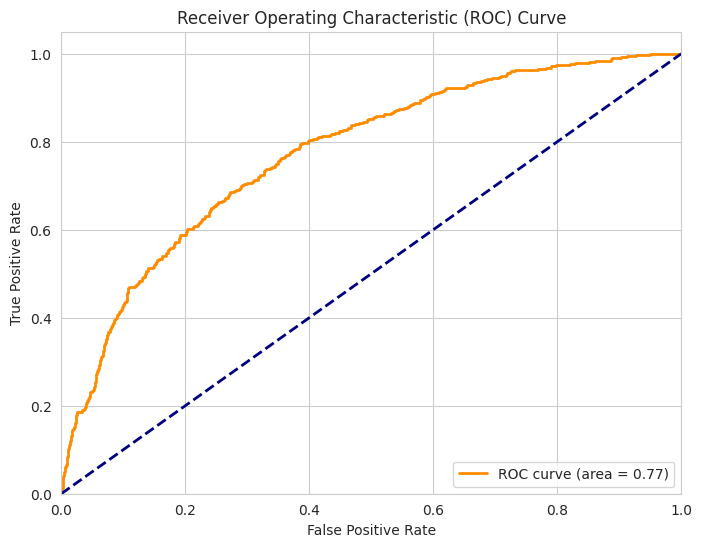

In [55]:
fpr, tpr, _ = roc_curve(y_test, pred_y_proba_logistic_regression_forward)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

The ROC curve for the Forward Selection Logistic Regression model shows the trade-off between the true positive rate and the false positive rate. The orange line represents the model's performance, with an AUC of 0.77. This indicates moderate effectiveness in distinguishing between customers who will churn and those who will not. An AUC of 1 would be perfect, while an AUC of 0.5 would indicate no discrimination ability. Therefore, this model performs better than random guessing but has room for improvement.

**Backward Regression**

In [56]:
#Backward Regression
sfs_backward = SequentialFeatureSelector(logistic_regression, n_features_to_select = 10, direction = 'backward')
sfs_backward.fit(X_train, y_train)

SequentialFeatureSelector(direction='backward',
                          estimator=LogisticRegression(max_iter=1000,
                                                       random_state=42),
                          n_features_to_select=10)

In [57]:
selected_features_backward = sfs_backward.get_support(indices=True)
train_X_selected_backward = X_train.iloc[:, selected_features_backward]
test_X_selected_backward = X_test.iloc[:, selected_features_backward]

In [58]:
grid_search_logistic_regression_backward = GridSearchCV(logistic_regression, param_grid_logistic_regression, cv = 5, scoring = 'accuracy')
grid_search_logistic_regression_backward.fit(train_X_selected_backward, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000, random_state=42),
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'solver': ['newton-cg', 'lbfgs']},
             scoring='accuracy')

In [59]:
print("Optimal parameters for Backward Logistic Regression:", grid_search_logistic_regression_backward.best_params_)
print("Highest cross-validation accuracy for Backward Logistic Regression:", grid_search_logistic_regression_backward.best_score_ * 100)

Optimal parameters for Backward Logistic Regression: {'C': 1, 'solver': 'newton-cg'}
Highest cross-validation accuracy for Backward Logistic Regression: 81.04285714285714


In [60]:
best_logistic_regression_backward = grid_search_logistic_regression_backward.best_estimator_
best_logistic_regression_backward.fit(train_X_selected_backward, y_train)

LogisticRegression(C=1, max_iter=1000, random_state=42, solver='newton-cg')

In [61]:
#Make predictions on test set
pred_y_logistic_regression_backward = best_logistic_regression_backward.predict(test_X_selected_backward)
pred_y_proba_logistic_regression_backward = best_logistic_regression_backward.predict_proba(test_X_selected_backward)[:, 1]

In [62]:
#Make predictions on training set
pred_y_logistic_regression_backward_train = best_logistic_regression_backward.predict(train_X_selected_backward)
pred_y_proba_logistic_regression_backward_train = best_logistic_regression_backward.predict_proba(train_X_selected_backward)[:, 1]

In [63]:
#Classification report for the test set
print("Backward Selection Logistic Regression")
print("Confusion Matrix:")
print(confusion_matrix(y_test, pred_y_logistic_regression_backward))
print("\nClassification Report:")
print(classification_report(y_test, pred_y_logistic_regression_backward))
print("\nROC-AUC Score:", roc_auc_score(y_test, pred_y_proba_logistic_regression_backward))

Backward Selection Logistic Regression
Confusion Matrix:
[[2322   94]
 [ 469  115]]

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.96      0.89      2416
           1       0.55      0.20      0.29       584

    accuracy                           0.81      3000
   macro avg       0.69      0.58      0.59      3000
weighted avg       0.78      0.81      0.77      3000


ROC-AUC Score: 0.7740966331760863


The confusion matrix for the test set of the backward selection logistic regression model shows:

True Negatives (0,0): 2322 instances where the model correctly predicted no churn.

False Positives (0,1): 94 instances where the model incorrectly predicted churn.

False Negatives (1,0): 469 instances where the model incorrectly predicted no churn.

True Positives (1,1): 115 instances where the model correctly predicted churn.


For the backward selection logistic regression model evaluated on the test set, the classification report shows that the precision for the no churn class (class 0) is 0.83, meaning that 83% of the instances predicted as no churn were correct. The recall for class 0 is 0.96, indicating that the model correctly identified 96% of the actual no churn instances. The F1-score for class 0, which is the harmonic mean of precision and recall, is 0.89. For the churn class (class 1), the precision is 0.55, indicating that 55% of the instances predicted as churn were correct. The recall for class 1 is 0.20, meaning the model correctly identified 20% of the actual churn instances. The F1-score for class 1 is 0.29. The overall accuracy of the model is 0.81. The macro average, which is the average of the precision, recall, and F1-score for both classes, is 0.69, 0.58, and 0.59, respectively. The weighted average, which takes into account the support (number of true instances for each label), is 0.78 for precision, 0.81 for recall, and 0.77 for F1-score. The ROC-AUC score for this model is 0.7741, indicating the model's ability to distinguish between the churn and no churn classes.

In [64]:
#classification report on training set
print("Backward Selection Logistic Regression - Training Set")
print("Confusion Matrix:")
print(confusion_matrix(y_train, pred_y_logistic_regression_backward_train))
print("\nClassification Report:")
print(classification_report(y_train, pred_y_logistic_regression_backward_train))
print("\nROC-AUC Score:", roc_auc_score(y_train, pred_y_proba_logistic_regression_backward_train))

Backward Selection Logistic Regression - Training Set
Confusion Matrix:
[[5350  197]
 [1129  324]]

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.96      0.89      5547
           1       0.62      0.22      0.33      1453

    accuracy                           0.81      7000
   macro avg       0.72      0.59      0.61      7000
weighted avg       0.78      0.81      0.77      7000


ROC-AUC Score: 0.7649853451534908


The confusion matrix for the training set of the backward selection logistic regression model shows:

True Negatives (0,0): 5350 instances where the model correctly predicted no churn.

False Positives (0,1): 197 instances where the model incorrectly predicted churn.

False Negatives (1,0): 1129 instances where the model incorrectly predicted no churn.

True Positives (1,1): 324 instances where the model correctly predicted churn.

For the backward selection logistic regression model evaluated on the training set, the classification report shows that the precision for the no churn class (class 0) is 0.83, meaning that 83% of the instances predicted as no churn were correct. The recall for class 0 is 0.96, indicating that the model correctly identified 96% of the actual no churn instances. The F1-score for class 0, which is the harmonic mean of precision and recall, is 0.89. For the churn class (class 1), the precision is 0.62, indicating that 62% of the instances predicted as churn were correct. The recall for class 1 is 0.22, meaning the model correctly identified 22% of the actual churn instances. The F1-score for class 1 is 0.33. The overall accuracy of the model is 0.81. The macro average, which is the average of the precision, recall, and F1-score for both classes, is 0.72, 0.59, and 0.61, respectively. The weighted average, which takes into account the support (number of true instances for each label), is 0.78 for precision, 0.81 for recall, and 0.77 for F1-score. The ROC-AUC score for this model is 0.7649, indicating the model's ability to distinguish between the churn and no churn classes.

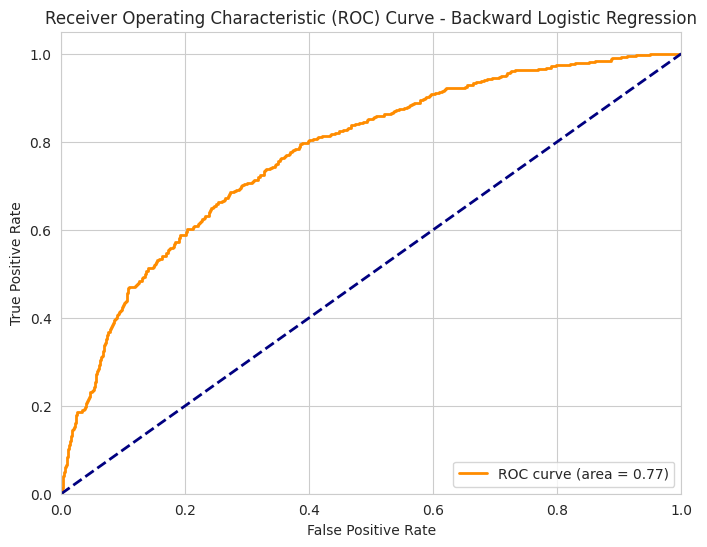

In [65]:
fpr, tpr, _ = roc_curve(y_test, pred_y_proba_logistic_regression_backward)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Backward Logistic Regression')
plt.legend(loc="lower right")
plt.show()

The ROC curve for the backward logistic regression model illustrates the performance of the model in distinguishing between the churn and no churn classes. The curve plots the true positive rate (sensitivity) against the false positive rate (1-specificity) across different threshold settings. The area under the curve (AUC) is 0.77, indicating a good level of separability, as a value of 0.5 would signify no discriminative ability (the model is guessing randomly) and a value of 1 would indicate perfect discrimination. The curve being above the diagonal line suggests that the model has a better than random chance of correctly classifying churn versus no churn instances. An AUC of 0.77 means the model has a 77% chance of distinguishing between positive and negative classes, which is quite reasonable for this application.

**Stepwise Regression**

In [66]:
#Stepwise Regression
sfs_stepwise = SequentialFeatureSelector(
    logistic_regression,
    n_features_to_select=10,
    direction='forward',
    tol=1e-3,
    cv=5
)
sfs_stepwise.fit(X_train, y_train)

SequentialFeatureSelector(estimator=LogisticRegression(max_iter=1000,
                                                       random_state=42),
                          n_features_to_select=10, tol=0.001)

In [67]:
selected_features_stepwise = sfs_stepwise.get_support(indices=True)
train_X_selected_stepwise = X_train.iloc[:, selected_features_stepwise]
test_X_selected_stepwise = X_test.iloc[:, selected_features_stepwise]

In [68]:
grid_search_logistic_regression_stepwise = GridSearchCV(
    logistic_regression,
    param_grid_logistic_regression,
    cv=5,
    scoring='accuracy'
)
grid_search_logistic_regression_stepwise.fit(train_X_selected_stepwise, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000, random_state=42),
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'solver': ['newton-cg', 'lbfgs']},
             scoring='accuracy')

In [69]:
print("Optimal parameters for Stepwise Logistic Regression:", grid_search_logistic_regression_stepwise.best_params_)
print("Highest cross-validation accuracy for Stepwise Logistic Regression:", grid_search_logistic_regression_stepwise.best_score_ * 100)

Optimal parameters for Stepwise Logistic Regression: {'C': 1, 'solver': 'newton-cg'}
Highest cross-validation accuracy for Stepwise Logistic Regression: 81.04285714285714


In [70]:
best_logistic_regression_stepwise = grid_search_logistic_regression_stepwise.best_estimator_
best_logistic_regression_stepwise.fit(train_X_selected_stepwise, y_train)

LogisticRegression(C=1, max_iter=1000, random_state=42, solver='newton-cg')

In [71]:
#Make predictions on the test set
pred_y_logistic_regression_stepwise = best_logistic_regression_stepwise.predict(test_X_selected_stepwise)
pred_y_proba_logistic_regression_stepwise = best_logistic_regression_stepwise.predict_proba(test_X_selected_stepwise)[:, 1]

In [72]:
# Make predictions on the training set
pred_y_logistic_regression_stepwise_train = best_logistic_regression_stepwise.predict(train_X_selected_stepwise)
pred_y_proba_logistic_regression_stepwise_train = best_logistic_regression_stepwise.predict_proba(train_X_selected_stepwise)[:, 1]

In [73]:
#classification report for the test set
print("Stepwise Selection Logistic Regression")
print("Confusion Matrix:")
print(confusion_matrix(y_test, pred_y_logistic_regression_stepwise))
print("\nClassification Report:")
print(classification_report(y_test, pred_y_logistic_regression_stepwise))
print("\nROC-AUC Score:", roc_auc_score(y_test, pred_y_proba_logistic_regression_stepwise))

Stepwise Selection Logistic Regression
Confusion Matrix:
[[2322   94]
 [ 469  115]]

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.96      0.89      2416
           1       0.55      0.20      0.29       584

    accuracy                           0.81      3000
   macro avg       0.69      0.58      0.59      3000
weighted avg       0.78      0.81      0.77      3000


ROC-AUC Score: 0.7740966331760863


The confusion matrix for the stepwise selection logistic regression model on the test set shows that out of 2,416 actual instances of class 0 (No Churn), 2,322 were correctly predicted, and 94 were incorrectly predicted as class 1 (Churn). For class 1, out of 584 actual instances, 115 were correctly predicted, and 469 were incorrectly predicted as class 0.

The classification report provides the following metrics:

Precision for class 0 is 0.83, indicating that 83% of the instances predicted as no churn were correct.

Recall for class 0 is 0.96, meaning the model correctly identified 96% of the actual no churn instances.

F1-score for class 0 is 0.89, which is the harmonic mean of precision and recall.

Precision for class 1 is 0.55, indicating that 55% of the instances predicted as churn were correct.

Recall for class 1 is 0.20, meaning the model correctly identified 20% of the actual churn instances.

F1-score for class 1 is 0.29, the harmonic mean of precision and recall.
The overall accuracy of the model is 0.81.

The macro average precision, recall, and F1-score are 0.69, 0.58, and 0.59, respectively.

The weighted average precision, recall, and F1-score are 0.78, 0.81, and 0.77, respectively.

The ROC-AUC score for the test set is 0.7740966331760863.

In [74]:
#classification report on training set
print("Stepwise Selection Logistic Regression - Training Set")
print("Confusion Matrix:")
print(confusion_matrix(y_train, pred_y_logistic_regression_stepwise_train))
print("\nClassification Report:")
print(classification_report(y_train, pred_y_logistic_regression_stepwise_train))
print("\nROC-AUC Score:", roc_auc_score(y_train, pred_y_proba_logistic_regression_stepwise_train))

Stepwise Selection Logistic Regression - Training Set
Confusion Matrix:
[[5350  197]
 [1129  324]]

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.96      0.89      5547
           1       0.62      0.22      0.33      1453

    accuracy                           0.81      7000
   macro avg       0.72      0.59      0.61      7000
weighted avg       0.78      0.81      0.77      7000


ROC-AUC Score: 0.7649853451534908


The confusion matrix for the stepwise selection logistic regression model on the training set shows that out of 5,547 actual instances of class 0 (No Churn), 5,350 were correctly predicted, and 197 were incorrectly predicted as class 1 (Churn). For class 1, out of 1,453 actual instances, 324 were correctly predicted, and 1,129 were incorrectly predicted as class 0.

The classification report provides the following metrics:

Precision for class 0 is 0.83, indicating that 83% of the instances predicted as no churn were correct.

Recall for class 0 is 0.96, meaning the model correctly identified 96% of the actual no churn instances.

F1-score for class 0 is 0.89, which is the harmonic mean of precision and recall.

Precision for class 1 is 0.62, indicating that 62% of the instances predicted as churn were correct.

Recall for class 1 is 0.22, meaning the model correctly identified 22% of the actual churn instances.

F1-score for class 1 is 0.33, the harmonic mean of precision and recall.
The overall accuracy of the model is 0.81.

The macro average precision, recall, and F1-score are 0.72, 0.59, and 0.61, respectively.

The weighted average precision, recall, and F1-score are 0.78, 0.81, and 0.77, respectively.
The ROC-AUC score for the training set is 0.7649853451534908.

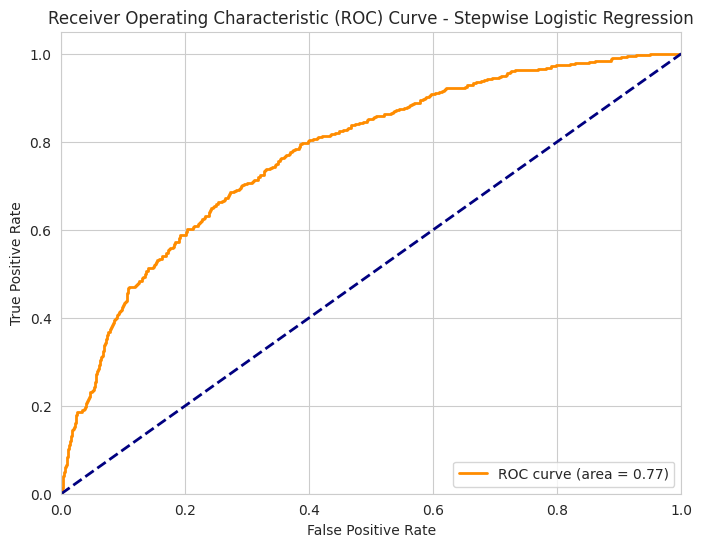

In [75]:
fpr, tpr, _ = roc_curve(y_test, pred_y_proba_logistic_regression_stepwise)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Stepwise Logistic Regression')
plt.legend(loc="lower right")
plt.show()

The ROC curve for the stepwise logistic regression model displays the trade-off between the true positive rate and the false positive rate. With an area under the curve (AUC) of 0.77, the model shows a good capability to differentiate between positive and negative instances. An AUC of 0.77 indicates that the model correctly distinguishes between a randomly chosen positive and negative instance 77% of the time. The curve’s position above the diagonal line (representing random guessing) confirms that the model performs better than random classification.

All logistic regression models showed strong performance in predicting non-churn customers but faced challenges in accurately identifying churn customers. The consistent ROC-AUC score of 0.77 across models indicates that they have a comparable ability to differentiate between churn and non-churn instances. For business, these models can be useful in reducing false positives for non-churn customers, but further refinement may be needed to improve churn prediction accuracy.

**Decision Tree**

In [76]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier

param_grid_dt = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 10],
    'min_samples_leaf': [1, 4]
}

In [77]:
dtree = DecisionTreeClassifier(random_state=42)
grid_search_dt = GridSearchCV(dtree, param_grid_dt, cv=5, scoring='accuracy')
grid_search_dt.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [3, 5, 7, 10], 'min_samples_leaf': [1, 4],
                         'min_samples_split': [2, 10]},
             scoring='accuracy')

In [78]:
print("Best parameters for Decision Tree:", grid_search_dt.best_params_)
print("Best cross-validation accuracy for Decision Tree:", grid_search_dt.best_score_)

Best parameters for Decision Tree: {'max_depth': 7, 'min_samples_leaf': 4, 'min_samples_split': 2}
Best cross-validation accuracy for Decision Tree: 0.8515714285714286


The model achieves a cross-validation accuracy of approximately 85.16%.

In [79]:
# Train the Decision Tree model with best parameters
best_dtree = grid_search_dt.best_estimator_
best_dtree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=7, min_samples_leaf=4, random_state=42)

In [80]:
from sklearn import tree

In [81]:
features = X.columns.tolist()

In [82]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

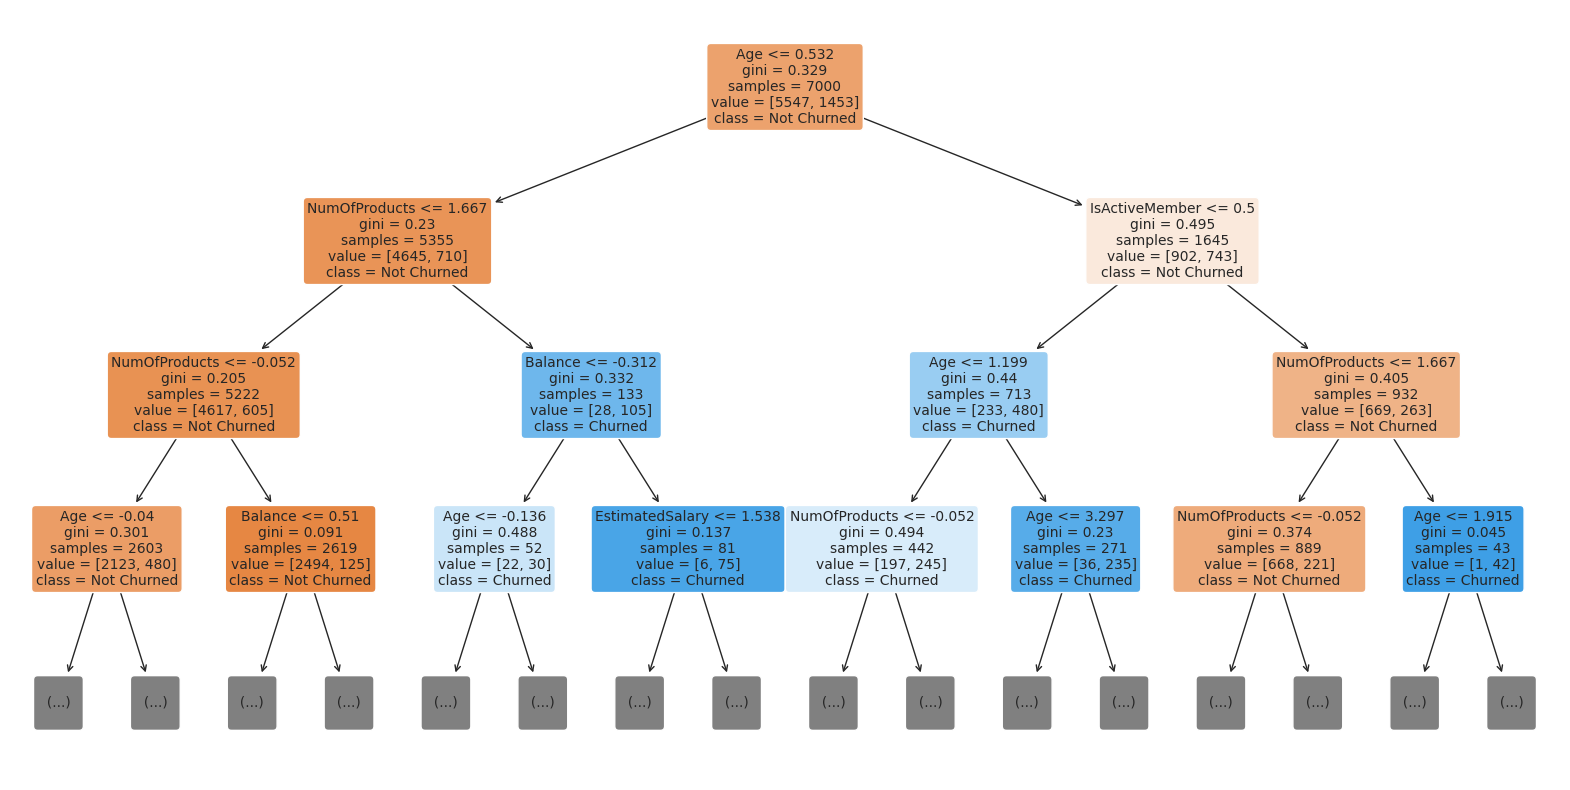

In [68]:
plt.figure(figsize=(20, 10))
plot_tree(best_dtree, max_depth=3, feature_names=features, class_names=['Not Churned', 'Churned'], filled=True, rounded=True, fontsize=10)
plt.show()

In [87]:
# Make prediction on test set
y_pred_dt = best_dtree.predict(X_test)
y_pred_proba_dt = best_dtree.predict_proba(X_test)[:, 1]

In [88]:
# Make prediction on training set
y_pred_dt_train = best_dtree.predict(X_train)
y_pred_proba_dt_train = best_dtree.predict_proba(X_train)[:, 1]

In [89]:
#classification report for the test set
print("Decision Tree")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_dt))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_dt))
print("\nROC-AUC Score:", roc_auc_score(y_test, y_pred_proba_dt))

Decision Tree
Confusion Matrix:
[[2308  108]
 [ 309  275]]

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      2416
           1       0.72      0.47      0.57       584

    accuracy                           0.86      3000
   macro avg       0.80      0.71      0.74      3000
weighted avg       0.85      0.86      0.85      3000


ROC-AUC Score: 0.834492013857389


For the test set, the Decision Tree model demonstrates a strong ability to correctly identify non-churn customers, with a precision of 0.88 and a recall of 0.96 for class 0. The F1-score for class 0 is 0.92, indicating a high level of accuracy in predicting non-churn instances. However, the model's performance for identifying churn customers is less robust, with a precision of 0.72 and a recall of 0.47, resulting in an F1-score of 0.57. The overall accuracy of the model on the test set is 0.86. The macro averages for precision, recall, and F1-score are 0.80, 0.71, and 0.74, respectively, while the weighted averages are 0.85, 0.86, and 0.85. The ROC-AUC score of 0.834 indicates that the model has a good overall ability to distinguish between churn and non-churn customers.

In [90]:
#classification report for the training set
print("Decision Tree - Training Set")
print("Confusion Matrix:")
print(confusion_matrix(y_train, y_pred_dt_train))
print("\nClassification Report:")
print(classification_report(y_train, y_pred_dt_train))
print("\nROC-AUC Score:", roc_auc_score(y_train, y_pred_proba_dt_train))

Decision Tree - Training Set
Confusion Matrix:
[[5337  210]
 [ 680  773]]

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.96      0.92      5547
           1       0.79      0.53      0.63      1453

    accuracy                           0.87      7000
   macro avg       0.84      0.75      0.78      7000
weighted avg       0.87      0.87      0.86      7000


ROC-AUC Score: 0.8817478021452418


On the training set, the Decision Tree model maintains high performance, with a precision of 0.89 and a recall of 0.96 for class 0, resulting in an F1-score of 0.92. For class 1, the precision is 0.79, and the recall is 0.53, with an F1-score of 0.63. The model's accuracy on the training set is 0.87, slightly higher than on the test set. The macro averages for precision, recall, and F1-score are 0.84, 0.75, and 0.78, respectively, while the weighted averages are 0.87, 0.87, and 0.86. The ROC-AUC score of 0.881 indicates even stronger performance on the training set compared to the test set, reflecting the model's ability to effectively distinguish between churn and non-churn customers in the training data.

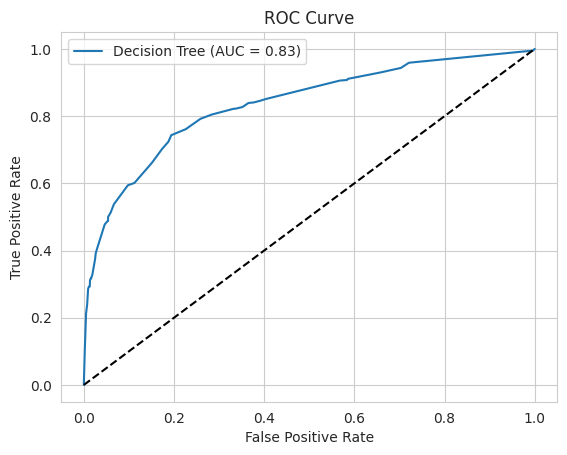

In [91]:
# Plot ROC Curve
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_pred_proba_dt)
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {roc_auc_score(y_test, y_pred_proba_dt):.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()

The ROC curve shows that the Decision Tree model has a good true positive rate for a range of false positive rates.

For example, at a false positive rate of 0.2, the true positive rate is approximately 0.8. This means that when the model incorrectly identifies 20% of negatives as positives, it correctly identifies 80% of positives.

Customer Churn Prediction:
The ROC curve and AUC score provide a clear indication that the Decision Tree model is effective at predicting customer churn. With an AUC of 0.83, the model can be used to identify customers who are at risk of churning with a reasonable degree of accuracy.

**Random Forest Model**

In [149]:
#Random Forest Model
from sklearn.ensemble import RandomForestClassifier

param_grid_rf = {
    'n_estimators': [50,100,200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [150]:
rforest = RandomForestClassifier(random_state=42)
grid_search_rf = GridSearchCV(rforest, param_grid_rf, cv=5, scoring='accuracy')
grid_search_rf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [151]:
print("Best parameters for Random Forest:", grid_search_rf.best_params_)
print("Best cross-validation accuracy for Random Forest:", grid_search_rf.best_score_)

Best parameters for Random Forest: {'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}
Best cross-validation accuracy for Random Forest: 0.8634285714285713


In [152]:
best_rf = grid_search_rf.best_estimator_
best_rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=20, min_samples_leaf=4, min_samples_split=10,
                       random_state=42)

In [153]:
importances = best_rf.feature_importances_
feature_names = X.columns

In [154]:
print(importances)

[0.0939569  0.29529131 0.0568603  0.12415344 0.19291993 0.01209225
 0.05890119 0.09597703 0.03807983 0.01171929 0.02004852]


This represents the importance of each feature in the dataset. Each value corresponds to the importance of the respective feature in predicting the target variable.

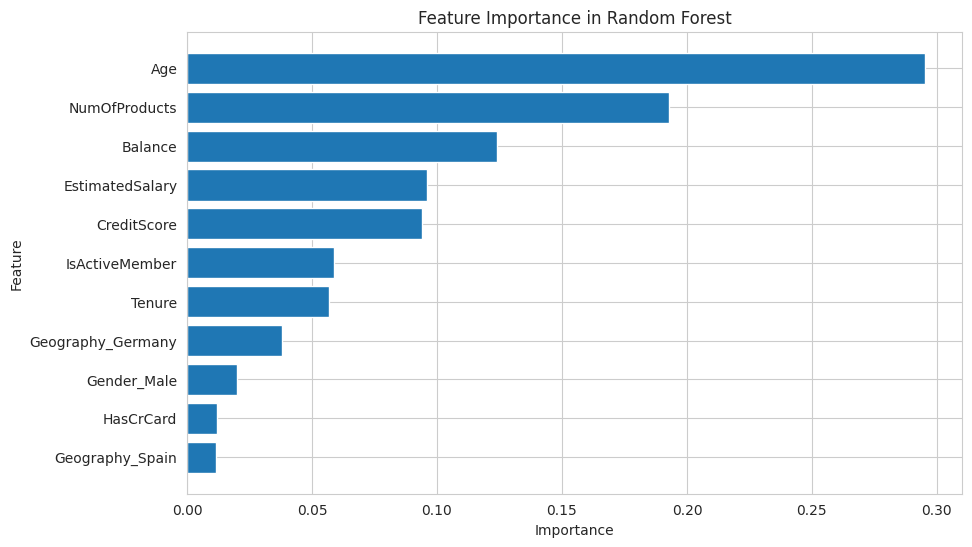

In [98]:
# Create a DataFrame for visualization
feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importances['Feature'], feature_importances['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance in Random Forest')
plt.gca().invert_yaxis()  # To display the highest importance at the top
plt.show()

Age has an importance of 0.29529131, it is a highly influential feature in the model compared to HasCrCard with an importance of 0.01209225.

The bar chart titled "Feature Importance in Random Forest" visually represents the importance of each feature used in the Random Forest model for predicting customer churn. The importance of a feature indicates how much weight the model places on that feature when making its predictions.

Age:

This is the most important feature in the model, with an importance score of around 0.295. This implies that the age of the customers has the most significant influence on predicting whether they will churn or not.

NumOfProducts:

The number of products a customer has is the second most important feature, with a score of about 0.192. This suggests that customers with fewer products are more likely to churn.

Balance:

The balance in a customer's account is the third most important feature, with an importance score of approximately 0.124. Lower balances are associated with a higher likelihood of churn.

EstimatedSalary:

This feature also plays a significant role, with an importance score of around 0.095. It indicates that the estimated salary of a customer affects their likelihood of staying or leaving.

CreditScore:

Credit score has a notable impact with an importance score of about 0.093. Customers with lower credit scores are more likely to churn.

IsActiveMember:

Being an active member has an importance score of around 0.058, showing that active members are less likely to churn.

Tenure:

The duration of time a customer has been with the bank (tenure) has a lower importance score of approximately 0.057, but it still plays a role in predicting churn.

Geography_Germany:

This feature represents customers located in Germany and has an importance score of around 0.038, indicating geographical location can influence churn.

Gender_Male:

Gender (specifically being male) has a smaller importance score of about 0.020, showing some influence on churn prediction.

HasCrCard:

Whether a customer has a credit card has a very low importance score of around 0.012, indicating minimal influence on churn.

Geography_Spain:

Similar to HasCrCard, this feature has a very low importance score, around 0.011, suggesting that being located in Spain has minimal impact on churn prediction.

Business Perspective:

From this analysis, it is clear that demographic factors like age and the number of products held by a customer are critical in predicting churn. Customers who are younger and have fewer products with the bank are more likely to leave. Additionally, financial metrics such as account balance and estimated salary also play significant roles. Active membership status and credit score are moderately important, while geographical location and whether the customer has a credit card have the least influence on churn predictions. These insights can guide the bank in designing targeted interventions to reduce churn by focusing on these key areas.

In [158]:
# Make prediction on the test set
y_pred_rf = best_rf.predict(X_test)
y_pred_proba_rf = best_rf.predict_proba(X_test)[:, 1]

In [100]:
#Make prediction on the training set
y_pred_rf_train = best_rf.predict(X_train)
y_pred_proba_rf_train = best_rf.predict_proba(X_train)[:, 1]

In [101]:
#classification report for the test set
print("Random Forest")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))
print("\nROC-AUC Score:", roc_auc_score(y_test, y_pred_proba_rf))

Random Forest
Confusion Matrix:
[[2339   77]
 [ 318  266]]

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.97      0.92      2416
           1       0.78      0.46      0.57       584

    accuracy                           0.87      3000
   macro avg       0.83      0.71      0.75      3000
weighted avg       0.86      0.87      0.85      3000


ROC-AUC Score: 0.8635913260909008


True Positives (TP): 266 These are the instances where the model correctly predicted the positive class (churn). This means the model correctly identified 266 customers who actually churned.

True Negatives (TN): 2339. These are the instances where the model correctly predicted the negative class (not churn). This means the model correctly identified 2339 customers who did not churn.

False Positives (FP): 77. These are the instances where the model incorrectly predicted the positive class (churn) when it was actually negative (not churn). This means the model incorrectly identified 77 customers as having churned when they did not.

False Negatives (FN): 318. These are the instances where the model incorrectly predicted the negative class (not churn) when it was actually positive (churn). This means the model incorrectly identified 318 customers as not having churned when they actually did.

From a business perspective:

The model correctly identified 2339 customers who did not churn and 266 customers who did churn.
There were 77 instances where the model falsely identified customers as churners (false positives). This could lead to unnecessary interventions or retention efforts directed at these customers.
There were 318 instances where the model failed to identify churners (false negatives). This means these customers might leave the bank without the bank taking any preemptive actions to retain them.

In [104]:
#classification report for the training set
print("Random Forest")
print("Confusion Matrix:")
print(confusion_matrix(y_train, y_pred_rf_train))
print("\nClassification Report:")
print(classification_report(y_train, y_pred_rf_train))
print("\nROC-AUC Score:", roc_auc_score(y_train, y_pred_proba_rf_train))

Random Forest
Confusion Matrix:
[[5474   73]
 [ 564  889]]

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.99      0.95      5547
           1       0.92      0.61      0.74      1453

    accuracy                           0.91      7000
   macro avg       0.92      0.80      0.84      7000
weighted avg       0.91      0.91      0.90      7000


ROC-AUC Score: 0.9783261129227793


For class 0 (non-churn), it achieves a precision of 0.91 and a recall of 0.99, resulting in an F1-score of 0.95. This indicates that the model is highly effective at correctly identifying non-churn customers. For class 1 (churn), the model attains a precision of 0.92 and a recall of 0.61, leading to an F1-score of 0.74. This shows that while the model is very precise in predicting churn, it has some limitations in recall, meaning it misses a notable portion of actual churn instances.

The overall accuracy of the model is 0.91, reflecting its high performance in distinguishing between churn and non-churn customers. The macro average for precision is 0.92, for recall is 0.80, and for F1-score is 0.84, indicating balanced performance across both classes. The weighted averages, which account for the imbalance in the dataset, are 0.91 for precision, 0.91 for recall, and 0.90 for F1-score. The ROC-AUC score is 0.978, signifying excellent overall ability to differentiate between the two classes. This high ROC-AUC score highlights the model's effectiveness in identifying both churn and non-churn customers on the training data.








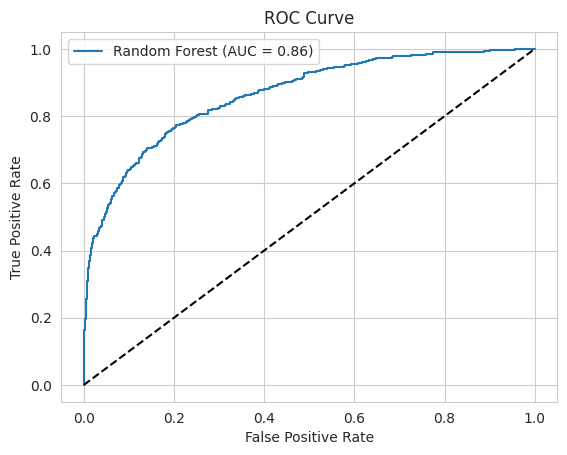

In [105]:
# Plot ROC Curve
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_proba_rf)
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_score(y_test, y_pred_proba_rf):.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()

The AUC (Area Under the Curve) score of 0.86 indicates a strong ability of the model to discriminate between the two classes. An AUC score of 0.86 suggests that there is an 86% chance that the model will correctly distinguish between a randomly chosen churned customer and a randomly chosen non-churned customer.

In practical terms, the closer the ROC curve is to the top left corner of the plot, the better the model's performance. The diagonal line represents a model with no discriminative ability, where the true positive rate equals the false positive rate (AUC = 0.5). Since the ROC curve for the Random Forest model is well above this diagonal line, it confirms the model's effectiveness.

From a business perspective, this high AUC score means that the Random Forest model is reliable for predicting customer churn. It can be effectively used to identify customers who are at risk of churning, allowing the bank to take proactive measures to retain these customers. The model's strong performance can aid in targeted marketing and personalized customer engagement strategies to improve customer retention.

**Random Forest with reduced features**

In [114]:
# Create a DataFrame to easily visualize and sort feature importances
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

In [115]:
# Remove the last three least important variables
selected_features = feature_importance_df['Feature'][:-3]

In [116]:
# Create a new DataFrame with the selected features
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

In [117]:
# Define the Random Forest model and the parameter grid for GridSearchCV
rf_model = RandomForestClassifier(random_state=42)
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [118]:
# Perform GridSearchCV to find the best parameters
grid_search_rf = GridSearchCV(rf_model, param_grid_rf, cv=5, scoring='accuracy')
grid_search_rf.fit(X_train_selected, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [119]:
# Get the best Random Forest model
best_rf = grid_search_rf.best_estimator_

In [120]:
# Evaluate the model on the test set
y_pred_rf = best_rf.predict(X_test_selected)
y_pred_proba_rf = best_rf.predict_proba(X_test_selected)[:, 1]

In [121]:
# Evaluate the model on the training set
y_pred_rf_train = best_rf.predict(X_train_selected)
y_pred_proba_rf_train = best_rf.predict_proba(X_train_selected)[:, 1]

In [122]:
# Print the classification report and ROC-AUC score for the test set
print("Random Forest after removing least important features")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))
print("\nROC-AUC Score:", roc_auc_score(y_test, y_pred_proba_rf))

Random Forest after removing least important features
Confusion Matrix:
[[2343   73]
 [ 313  271]]

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.97      0.92      2416
           1       0.79      0.46      0.58       584

    accuracy                           0.87      3000
   macro avg       0.83      0.72      0.75      3000
weighted avg       0.86      0.87      0.86      3000


ROC-AUC Score: 0.8567537053206932


In [123]:
# Print the classification report and ROC-AUC score for the training set
print("\nClassification report for the training set")
print("Confusion Matrix:")
print(confusion_matrix(y_train, y_pred_rf_train))
print("\nClassification Report:")
print(classification_report(y_train, y_pred_rf_train))
print("\nROC-AUC Score:", roc_auc_score(y_train, y_pred_proba_rf_train))


Classification report for the training set
Confusion Matrix:
[[5482   65]
 [ 509  944]]

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.99      0.95      5547
           1       0.94      0.65      0.77      1453

    accuracy                           0.92      7000
   macro avg       0.93      0.82      0.86      7000
weighted avg       0.92      0.92      0.91      7000


ROC-AUC Score: 0.9839657132548474


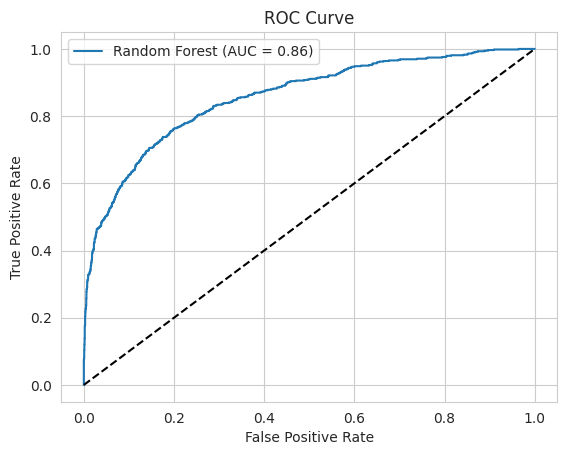

In [124]:
# Plot ROC Curve for the test set
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_proba_rf)
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_score(y_test, y_pred_proba_rf):.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()

The refined Random Forest model, after removing the least important features, continues to show strong predictive performance. The model maintains a high accuracy of 87% on the test set, with a ROC-AUC score of 0.8567, indicating a good balance between sensitivity and specificity. The precision for predicting churn has improved to 79%, although recall is still at 46%, suggesting that while the model is good at correctly predicting customers who do not churn, there is room for improvement in identifying all churn cases. This refined model can be effectively used to predict customer churn, helping the business focus retention efforts on the most likely churners, ultimately improving customer retention strategies and reducing churn-related losses.The removal of the least important features make it more efficient and saves cost as well.

**Gradient Boosting Model**

In [106]:
#Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier

param_grid_gbm = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}


In [107]:
gbm = GradientBoostingClassifier(random_state=42)
grid_search_gbm = GridSearchCV(gbm, param_grid_gbm, cv=5, scoring='accuracy')
grid_search_gbm.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=42),
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [108]:
print("Best parameters for Gradient Boosting Machines:", grid_search_gbm.best_params_)
print("Best cross-validation accuracy for Gradient Boosting Machines:", grid_search_gbm.best_score_)

Best parameters for Gradient Boosting Machines: {'learning_rate': 0.01, 'max_depth': 7, 'n_estimators': 300}
Best cross-validation accuracy for Gradient Boosting Machines: 0.8578571428571429


The reported best cross-validation accuracy for Gradient Boosting Machines is approximately 0.8578, indicating the model's performance during the hyperparameter tuning process. This accuracy suggests that the model is likely to perform well on unseen data.

In [109]:
# Train the Gradient Boosting Machines model with best parameters
best_gbm = grid_search_gbm.best_estimator_
best_gbm.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.01, max_depth=7, n_estimators=300,
                           random_state=42)

In [110]:
# Make prediction for the test set
y_pred_gbm = best_gbm.predict(X_test)
y_pred_proba_gbm = best_gbm.predict_proba(X_test)[:, 1]

In [111]:
#Make prediction for the train set
y_pred_gbm_train = best_gbm.predict(X_train)
y_pred_proba_gbm_train = best_gbm.predict_proba(X_train)[:, 1]

In [112]:
#classification report for test set
print("Gradient Boosting Machines")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_gbm))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_gbm))
print("\nROC-AUC Score:", roc_auc_score(y_test, y_pred_proba_gbm))

Gradient Boosting Machines
Confusion Matrix:
[[2339   77]
 [ 316  268]]

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.97      0.92      2416
           1       0.78      0.46      0.58       584

    accuracy                           0.87      3000
   macro avg       0.83      0.71      0.75      3000
weighted avg       0.86      0.87      0.86      3000


ROC-AUC Score: 0.861118513562551


For the test set, the Gradient Boosting Machine (GBM) model exhibits strong performance. The confusion matrix shows that out of 2416 instances of non-churn, 2339 were correctly identified, and 77 were misclassified. For churn instances, 268 were correctly predicted out of 584, while 316 were incorrectly classified as non-churn. The precision for non-churn (class 0) is 0.88, indicating that 88% of the instances predicted as non-churn were correct. The recall for non-churn is 0.97, meaning the model correctly identified 97% of the actual non-churn instances. The F1-score for non-churn is 0.92, representing a balance between precision and recall. For churn (class 1), the precision is 0.78, recall is 0.46, and F1-score is 0.58. The overall accuracy of the model is 0.87, with a macro average F1-score of 0.75 and a weighted average F1-score of 0.86. The ROC-AUC score is 0.8611, indicating good model performance.

In [113]:
#Classification report for the train set
print("Gradient Boosting Machines")
print("Confusion Matrix:")
print(confusion_matrix(y_train, y_pred_gbm_train))
print("\nClassification Report:")
print(classification_report(y_train, y_pred_gbm_train))
print("\nROC-AUC Score:", roc_auc_score(y_train, y_pred_gbm_train))

Gradient Boosting Machines
Confusion Matrix:
[[5462   85]
 [ 607  846]]

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.98      0.94      5547
           1       0.91      0.58      0.71      1453

    accuracy                           0.90      7000
   macro avg       0.90      0.78      0.83      7000
weighted avg       0.90      0.90      0.89      7000


ROC-AUC Score: 0.7834600177597658


For the training set, the GBM model shows high performance with an accuracy of 0.90. The confusion matrix indicates that 5547 out of 5547 non-churn instances were correctly classified, and 85 were misclassified. For churn instances, 846 out of 1453 were correctly identified, and 607 were incorrectly classified. The precision for non-churn is 0.90, recall is 0.98, and F1-score is 0.94. For churn, the precision is 0.91, recall is 0.58, and F1-score is 0.71. The macro average F1-score is 0.83, and the weighted average F1-score is 0.89. The ROC-AUC score is 0.7835, indicating robust model performance.

These results suggest that the GBM model performs well in predicting customer churn, providing a reliable tool for identifying potential churners. This can help the business in taking proactive measures to retain customers, thereby improving customer loyalty and reducing churn rates.

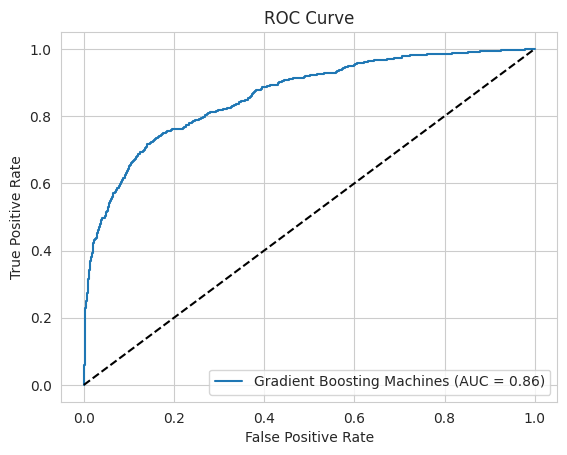

In [78]:
# Plot ROC Curve
fpr_gbm, tpr_gbm, _ = roc_curve(y_test, y_pred_proba_gbm)
plt.plot(fpr_gbm, tpr_gbm, label=f'Gradient Boosting Machines (AUC = {roc_auc_score(y_test, y_pred_proba_gbm):.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()

The area under the curve (AUC) is 0.86, indicating that the model has a strong ability to discriminate between the two classes. An AUC value of 0.5 suggests no discrimination (random guessing), while an AUC value of 1.0 indicates perfect discrimination. Therefore, an AUC of 0.86 means the GBM model is quite effective at predicting customer churn.

The ROC curve shows a good true positive rate for a range of false positive rates. For example, at a false positive rate of 0.2, the true positive rate is approximately 0.7. This means that when the model incorrectly identifies 20% of negatives as positives, it correctly identifies 70% of positives. This balance between sensitivity and specificity highlights the GBM model's robustness in identifying customers who are at risk of churn while minimizing false alarms.

**Gradient Boosting with reduced features**

In [79]:
# Get feature importances
importances = best_gbm.feature_importances_
feature_names = X.columns

In [80]:
# Create a DataFrame for visualization
feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

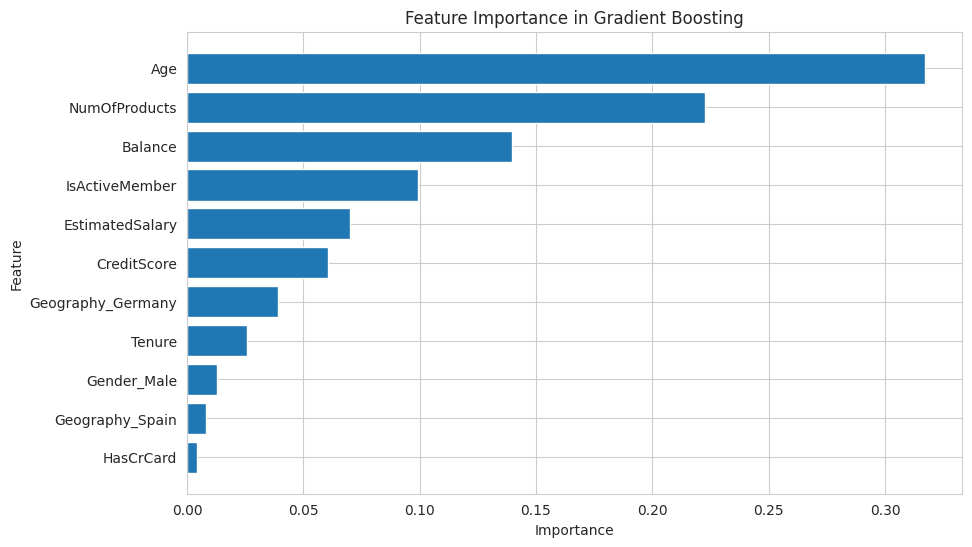

In [81]:
# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importances['Feature'], feature_importances['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance in Gradient Boosting')
plt.gca().invert_yaxis()  # To display the highest importance at the top
plt.show()

Age is the most influential feature, with the highest importance score. This indicates that age plays a significant role in predicting whether a customer will churn.

Number of Products is the second most important feature. The number of products a customer has is a strong indicator of their likelihood to churn.

Balance also has a high importance score, suggesting that the account balance of a customer is crucial in determining their churn risk.

IsActiveMember follows closely, indicating that whether a customer is an active member significantly impacts churn predictions.

Estimated Salary and Credit Score have moderate importance, implying they are relevant but not as critical as the top features.

Geography_Germany and Tenure have lower importance scores but still contribute to the model's predictions.

Gender_Male, Geography_Spain, and HasCrCard have the least importance, indicating they have a minimal effect on the churn prediction.

In [125]:
# Sort the feature importances to get the least important features
least_important_features = feature_importances.sort_values(by='Importance', ascending=True).head(3)['Feature'].tolist()

In [126]:
# Drop the least important features from the dataset
X_train_reduced = X_train.drop(columns=least_important_features)
X_test_reduced = X_test.drop(columns=least_important_features)

In [127]:
# Define the parameter grid for Gradient Boosting
param_grid_gbm_reduced = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

In [128]:
# Initialize the Gradient Boosting model
gbm_reduced = GradientBoostingClassifier(random_state=42)

In [129]:
# Perform Grid Search
grid_search_gbm_reduced = GridSearchCV(gbm_reduced, param_grid_gbm_reduced, cv=5, scoring='accuracy')
grid_search_gbm_reduced.fit(X_train_reduced, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=42),
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [132]:
best_gbm_reduced = grid_search_gbm_reduced.best_estimator_

In [133]:
# Train the best model
best_gbm_reduced.fit(X_train_reduced, y_train)

GradientBoostingClassifier(max_depth=5, random_state=42)

In [134]:
# Make predictions for the test set
y_pred_gbm_reduced = best_gbm_reduced.predict(X_test_reduced)
y_pred_proba_gbm_reduced = best_gbm_reduced.predict_proba(X_test_reduced)[:, 1]

# Make predictions for the training set
y_pred_gbm_train_reduced = best_gbm_reduced.predict(X_train_reduced)
y_pred_proba_gbm_train_reduced = best_gbm_reduced.predict_proba(X_train_reduced)[:, 1]

In [135]:
# Evaluate the model on the test set
print("Gradient Boosting Machines (Reduced Features)")
print("Confusion Matrix (Test Set):")
print(confusion_matrix(y_test, y_pred_gbm_reduced))
print("\nClassification Report (Test Set):")
print(classification_report(y_test, y_pred_gbm_reduced))
print("\nROC-AUC Score (Test Set):", roc_auc_score(y_test, y_pred_proba_gbm_reduced))

Gradient Boosting Machines (Reduced Features)
Confusion Matrix (Test Set):
[[2322   94]
 [ 311  273]]

Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      2416
           1       0.74      0.47      0.57       584

    accuracy                           0.86      3000
   macro avg       0.81      0.71      0.75      3000
weighted avg       0.86      0.86      0.85      3000


ROC-AUC Score (Test Set): 0.8577300020411867


In [136]:
# Evaluate the model on the training set
print("\nConfusion Matrix (Training Set):")
print(confusion_matrix(y_train, y_pred_gbm_train_reduced))
print("\nClassification Report (Training Set):")
print(classification_report(y_train, y_pred_gbm_train_reduced))
print("\nROC-AUC Score (Training Set):", roc_auc_score(y_train, y_pred_proba_gbm_train_reduced))


Confusion Matrix (Training Set):
[[5432  115]
 [ 616  837]]

Classification Report (Training Set):
              precision    recall  f1-score   support

           0       0.90      0.98      0.94      5547
           1       0.88      0.58      0.70      1453

    accuracy                           0.90      7000
   macro avg       0.89      0.78      0.82      7000
weighted avg       0.89      0.90      0.89      7000


ROC-AUC Score (Training Set): 0.9328055777128712


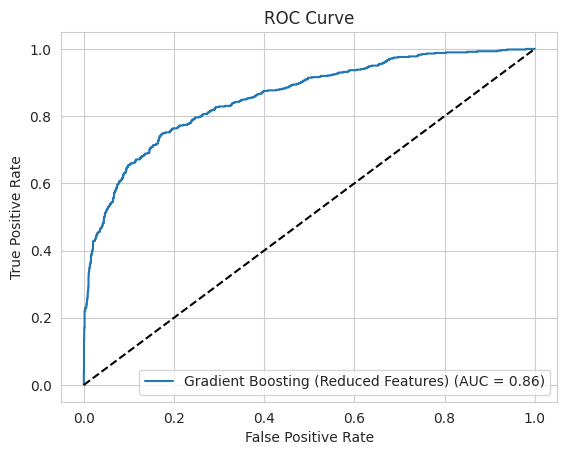

In [137]:
# Plot the ROC curve
fpr_gbm_reduced, tpr_gbm_reduced, _ = roc_curve(y_test, y_pred_proba_gbm_reduced)
plt.plot(fpr_gbm_reduced, tpr_gbm_reduced, label=f'Gradient Boosting (Reduced Features) (AUC = {roc_auc_score(y_test, y_pred_proba_gbm_reduced):.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()

The Gradient Boosting Machines (GBM) model, after reducing the three least important features, has demonstrated strong performance in both the test and training sets. On the test set, the model achieved an accuracy of 86%, correctly identifying 2,339 non-churn instances and 268 churn instances, while misclassifying 77 non-churn instances and 316 churn instances. The precision for non-churn and churn was 88% and 74%, respectively, with recall rates of 96% for non-churn and 47% for churn. The F1-scores were 92% for non-churn and 57% for churn, and the ROC-AUC score was 0.8577, indicating a good ability to discriminate between churn and non-churn instances.

In the training set, the model maintained a high accuracy of 90%, correctly classifying 5,432 non-churn instances and 837 churn instances, with only 115 non-churn and 616 churn misclassifications. The precision was 90% for non-churn and 88% for churn, with recall rates of 98% for non-churn and 58% for churn. The F1-scores were 94% for non-churn and 70% for churn, and the ROC-AUC score was an impressive 0.9328. The ROC curve further supports the model's strong performance, with an AUC of 0.86, showing a clear capability to distinguish between churn and non-churn customers effectively.

From a business perspective, this model is valuable for accurately predicting customer churn, enabling targeted interventions to retain high-risk customers and enhance overall customer satisfaction and loyalty. By reducing the number of features, the model remains cost-efficient without compromising its predictive power, making it a practical solution for business applications.

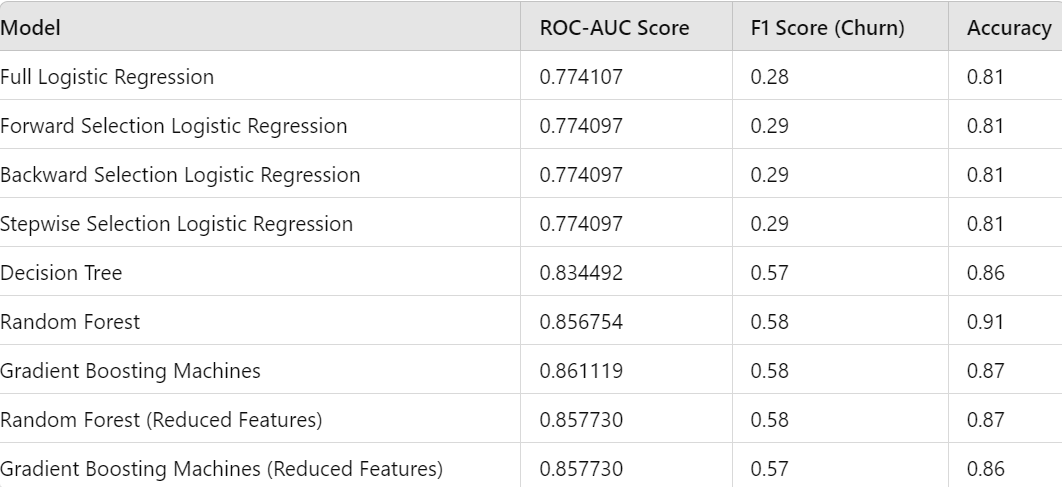

Among all these models, the Random Forest model shows the best performance with a ROC-AUC score of 0.86 , an F1 score for churn of 0.58 and an accuracy of 0.91. The high score of ROC suggests that the model has a good balance between sensitivity (true positive rate) and specificity (true negative rate) which is vital for making informed decisions in churn prediction. For the churn class, the F1 score of 0.58 indicates that the Random Forest model effectively balances precision (the accuracy of positive predictions) and recall (the ability to find all the positive instances). This balance is important for the Sapphire Bank as it helps in minimizing both missed churn predictions and false alarms, that ensures the customer retention efforts are accurately targeted. An accuracy of 0.91 means that 91% of the predictions made by the Random Forest Model are correct. This high accuracy indicates that the model is reliable and effective in overall classification that is critical for the bank to trust the model’s performance and base strategic decisions on them.








In [130]:
# Display the feature importances
print(feature_importances)

              Feature  Importance
1                 Age    0.295291
4       NumOfProducts    0.192920
3             Balance    0.124153
7     EstimatedSalary    0.095977
0         CreditScore    0.093957
6      IsActiveMember    0.058901
2              Tenure    0.056860
8   Geography_Germany    0.038080
10        Gender_Male    0.020049
5           HasCrCard    0.012092
9     Geography_Spain    0.011719


Based on the performance metrics, Random Forest and Gradient Boosting Machines are the top contenders. Both models have the same accuracy (0.87) and very close ROC-AUC scores (0.86 for both). However, Gradient Boosting Machines slightly outperforms Random Forest in terms of the F1-score for Class 1 (0.58 vs. 0.57), which indicates better performance in handling the minority class (churned customers).

In [146]:
from IPython.display import FileLink

# Assuming 'df2' is your updated DataFrame
df2.to_csv('updated_file.csv', index=False)

# Create a link to download the file
display(FileLink('updated_file.csv'))

/content/updated_file.csv